# **Introduction**

The purpose of this project is to determine which data analysis skills are associated with higher salaries. We will use data scraped from [Glassdoor](https://www.glassdoor.com/member/home/index.htm). This file contains the exploratory data analysis portion of the project. To view the scraping files of each role, please select the respective link in the Job Titles list. To view scraping exploration or the model testing, please select the respective link from additional links.

**Job Titles:**
*   [Data Analyst](https://colab.research.google.com/drive/1AW0rNTs84Cq7GrJiDq86WWCisB4q6ZwO?usp=sharing)
*   [Business Analyst](https://colab.research.google.com/drive/1I1lolzuZgoUZGBwAEP9hZNf7my8XItbz?usp=sharing)
*   [Data Engineer](https://colab.research.google.com/drive/18HMhZXcv4xwxDUXGDauYEGdnDJLjNYxf?usp=sharing)
*   [Data Scientist](https://colab.research.google.com/drive/1i8UQMiObiOKAyzlrAsFCBPitqIh90Y5O?usp=sharing)

**Locations**
*   Austin, TX
*   Boston, MA
*   Chicago, IL
*   Colorado
*   Los Angeles, CA
*   New York City, NY
*   San Francisco, CA
*   Seattle, WA



**Additional Links**
*    [Scraping Exploration](https://colab.research.google.com/drive/1K1VMiRG_wzVm0wBSyBHoJJ77rSpZM-wf?usp=sharing)
*    [Model Building & Testing](https://colab.research.google.com/drive/1AyO8kZANyqWAacCn7Odrt5DhW9ZkAZEU?usp=sharing)

## **Set Environment & Initial Request**

In [1]:
#set environment
import collections
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import scipy.stats as stats
import seaborn as sns
import spacy
import statsmodels.api as sm
import string
import textwrap

from bs4 import BeautifulSoup as soup
from collections import Counter
from IPython.core.display import clear_output
from nltk.corpus import stopwords
from random import randint
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import text
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import  classification_report, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost.sklearn import XGBRegressor
from statsmodels.tools.eval_measures import mse, rmse
from time import time, sleep
from wordcloud import WordCloud

nltk.download('stopwords')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Combine Scraped Data from Each Role**

### **Import Each Role's Scraped Data**

In [2]:
da_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/da_jobs_321_df.csv?dl=0')
ba_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ba_jobs_321_df.csv?dl=0')
de_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/de_jobs_321_df.csv?dl=0')
ds_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ds_jobs_321_df.csv?dl=0')

da_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/da_jobs_328_df.csv?dl=0')
ba_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ba_jobs_328_df.csv?dl=0')
de_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/de_jobs_328_df.csv?dl=0')
ds_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ds_jobs_328_df.csv?dl=0')

da_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/da_jobs_404_df.csv?dl=0')
ba_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ba_jobs_404_df.csv?dl=0')
de_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/de_jobs_404_df.csv?dl=0')
ds_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ds_jobs_404_df.csv?dl=0')

da_411_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/da_jobs_411_df.csv?dl=0')
ba_411_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ba_jobs_411_df.csv?dl=0')
de_411_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/de_jobs_411_df.csv?dl=0')
ds_411_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ds_jobs_411_df.csv?dl=0')

da_418_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/da_jobs_418_df.csv?dl=0')
ba_418_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ba_jobs_418_df.csv?dl=0')
de_418_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/de_jobs_418_df.csv?dl=0')
ds_418_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ds_jobs_418_df.csv?dl=0')

da_425_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/da_jobs_425_df.csv?dl=0')
ba_425_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ba_jobs_425_df.csv?dl=0')
de_425_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/de_jobs_425_df.csv?dl=0')
ds_425_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Data-Industry-Salary-Prediction/main/ScrapedDataCSVs/ds_jobs_425_df.csv?dl=0')

In [3]:
#add a column to keep track of how many results came from each scarpe date
da_321_jobs['scrape_date'] = '3/21/21'
ba_321_jobs['scrape_date'] = '3/21/21'
de_321_jobs['scrape_date'] = '3/21/21'
ds_321_jobs['scrape_date'] = '3/21/21'

da_328_jobs['scrape_date'] = '3/28/21'
ba_328_jobs['scrape_date'] = '3/28/21'
de_328_jobs['scrape_date'] = '3/28/21'
ds_328_jobs['scrape_date'] = '3/28/21'

da_404_jobs['scrape_date'] = '4/04/21'
ba_404_jobs['scrape_date'] = '4/04/21'
de_404_jobs['scrape_date'] = '4/04/21'
ds_404_jobs['scrape_date'] = '4/04/21'

da_411_jobs['scrape_date'] = '4/11/21'
ba_411_jobs['scrape_date'] = '4/11/21'
de_411_jobs['scrape_date'] = '4/11/21'
ds_411_jobs['scrape_date'] = '4/11/21'

da_418_jobs['scrape_date'] = '4/18/21'
ba_418_jobs['scrape_date'] = '4/18/21'
de_418_jobs['scrape_date'] = '4/18/21'
ds_418_jobs['scrape_date'] = '4/18/21'

da_425_jobs['scrape_date'] = '4/25/21'
ba_425_jobs['scrape_date'] = '4/25/21'
de_425_jobs['scrape_date'] = '4/25/21'
ds_425_jobs['scrape_date'] = '4/25/21'

### **Combine Scraped Data**

In [4]:
#combine df's
search_list = [da_321_jobs, ba_321_jobs, de_321_jobs, ds_321_jobs, da_328_jobs, 
               ba_328_jobs, de_328_jobs, ds_328_jobs, da_404_jobs, 
               ba_404_jobs, de_404_jobs, ds_404_jobs, da_411_jobs, 
               ba_411_jobs, de_411_jobs, ds_411_jobs, da_418_jobs, 
               ba_418_jobs, de_418_jobs, ds_418_jobs, da_425_jobs, 
               ba_425_jobs, de_425_jobs, ds_425_jobs]
scraped_data = pd.concat(search_list, ignore_index=True)
scraped_data

,Unnamed: 0,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job,scrape_date,Unnamed: 0.1
0,0,Aston Carter,Business Services,3.5,Data Analyst Sr.,"Austin, TX",$52K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,3/21/21,NaN
1,1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,3/21/21,NaN
2,2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,3/21/21,NaN
3,3,SamCart,Business Services,4.5,Data Analyst,"Austin, TX",$32K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,3/21/21,NaN
4,4,Publicis Sapient,Business Services,3.7,Data Analyst,"Austin, TX",$44K - $80K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,3/21/21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7258,55,Inviso Corporation,Business Services,3.9,Data Engineer - Marketing (FTE) - Remote,"Bellevue, WA",$94K - $125K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Our team is growing! We are excited to be hiri...,sea,ds,4/25/21,NaN
7259,56,Microsoft,Information Technology,4.4,Principal Data & Applied Scientist Manager,"Redmond, WA",$182K - $194K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Are you looking for opportunities to deliver i...,sea,ds,4/25/21,NaN
7260,57,University of Washington,Education,4.3,RESEARCH SCIENTIST/ENGINEER 1,"Seattle, WA",$25K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Notes: The University of Washington is followi...,sea,ds,4/25/21,NaN
7261,58,Qualtrics,Information Technology,4.1,Staff Applied Scientist-Machine Learning,"Seattle, WA",$111K - $176K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,The ChallengeWe are looking for talented and i...,sea,ds,4/25/21,NaN


### **Format Scraped Data**

#### **Drop Unnamed Column**

In [5]:
#drop Unnamed column
scraped_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

scraped_data

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job,scrape_date
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,"Austin, TX",$52K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,3/21/21
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,3/21/21
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,3/21/21
3,SamCart,Business Services,4.5,Data Analyst,"Austin, TX",$32K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,3/21/21
4,Publicis Sapient,Business Services,3.7,Data Analyst,"Austin, TX",$44K - $80K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,3/21/21
...,...,...,...,...,...,...,...,...,...,...,...
7258,Inviso Corporation,Business Services,3.9,Data Engineer - Marketing (FTE) - Remote,"Bellevue, WA",$94K - $125K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Our team is growing! We are excited to be hiri...,sea,ds,4/25/21
7259,Microsoft,Information Technology,4.4,Principal Data & Applied Scientist Manager,"Redmond, WA",$182K - $194K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Are you looking for opportunities to deliver i...,sea,ds,4/25/21
7260,University of Washington,Education,4.3,RESEARCH SCIENTIST/ENGINEER 1,"Seattle, WA",$25K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Notes: The University of Washington is followi...,sea,ds,4/25/21
7261,Qualtrics,Information Technology,4.1,Staff Applied Scientist-Machine Learning,"Seattle, WA",$111K - $176K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,The ChallengeWe are looking for talented and i...,sea,ds,4/25/21


#### **Check for Duplicate Rows**

In [6]:
#Checking for duplicate rows based on specific columns
duplicate = scraped_data[scraped_data.duplicated(['company', 'industry', 'rank', 'job_title', 'location', 'salary_range',
       'description','search_city'])] 
print('Duplicate Rows:')
duplicate

Duplicate Rows:


,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job,scrape_date
281,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,ba,3/21/21
283,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,ba,3/21/21
318,Cogo Labs,Information Technology,3.4,Quantitative Data Analyst,"Cambridge, MA",$60K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Cogo Labs, we build startup companies from ...",bos,ba,3/21/21
331,Service Credit Union,Finance,3.7,"Marketing Data Analyst, Portsmouth","Portsmouth, NH",$36K - $65K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Are you interested in applying your research a...,bos,ba,3/21/21
389,Uline,NaN,3.7,Supply Chain Data Analyst,"Pleasant Prairie, WI",$65K - $79K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,Supply Chain Data AnalystCorporate Headquarter...,chi,ba,3/21/21
...,...,...,...,...,...,...,...,...,...,...,...
7241,Apple,Information Technology,4.3,"AI/ML - Embedded Data Scientist, Siri Data","Seattle, WA",$106K - $168K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"SummaryPosted: May 1, 2020Role Number:20016735...",sea,ds,4/25/21
7252,Ursus,Information Technology,4.4,Data Analyst - Small Business Group,"Seattle, WA",$30K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job Title: Data Analyst - Small Business Group...,sea,ds,4/25/21
7253,Ursus,Information Technology,4.4,Data Analyst - Product Strategy,"Seattle, WA",$39K - $72K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job Title: Data Analyst - Product StrategyLoca...,sea,ds,4/25/21
7255,Compass,Information Technology,4.0,Senior Data Analyst,"Seattle, WA",$98K - $113K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Compass, we envision a world where the expe...",sea,ds,4/25/21


In [7]:
#investigate one company for duplicates
duplicate_lib_mutual = scraped_data['company']=='Liberty Mutual Insurance'
scraped_data.iloc[duplicate_lib_mutual.values]

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job,scrape_date
313,Liberty Mutual Insurance,Insurance,3.8,"Account Analyst, Construction","Boston, MA",$34K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba,3/21/21
320,Liberty Mutual Insurance,Insurance,3.8,Account Analyst,"Boston, MA",$34K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba,3/21/21
335,Liberty Mutual Insurance,Insurance,3.8,"Principal Business Analyst ll, Turner Construc...","East Boston, MA",$106K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"A little about us\nAt Liberty Mutual, our purp...",bos,ba,3/21/21
342,Liberty Mutual Insurance,Insurance,3.8,"Senior Business Analyst, Liberty Specialty Mar...","East Boston, MA",$78K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba,3/21/21
344,Liberty Mutual Insurance,Insurance,3.8,Global Reinsurance Operations Manager,"East Boston, MA",$97K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba,3/21/21
...,...,...,...,...,...,...,...,...,...,...,...
6541,Liberty Mutual Insurance,Insurance,3.8,Analyst / Senior Analyst - Product Solutions,"Seattle, WA",$65K - $136K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ba,4/25/21
6622,Liberty Mutual Insurance,Insurance,3.8,Senior Cybersecurity Engineer,"Boston, MA",$112K - $122K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,de,4/25/21
6642,Liberty Mutual Insurance,Insurance,3.8,Software Engineer,"Boston, MA",$55K - $113K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Do you have the skills—and drive—to join a tec...,bos,de,4/25/21
6892,Liberty Mutual Insurance,Insurance,3.8,"Analyst II/Assistant Director, Data Science","Boston, MA",$101K - $136K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Liberty Mutual’s newly formed Global Risk Solu...,bos,ds,4/25/21


In [8]:
#investigate the rows that were duplicates
dup_lib_mutual = duplicate['company']=='Liberty Mutual Insurance'
duplicate.iloc[dup_lib_mutual.values]

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job,scrape_date
1036,Liberty Mutual Insurance,Insurance,3.8,Experienced Data Engineer,"Boston, MA",$64K - $110K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds,3/21/21
1040,Liberty Mutual Insurance,Insurance,3.8,Senior Data Engineer,"Boston, MA",$77K - $139K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds,3/21/21
1372,Liberty Mutual Insurance,Insurance,3.8,Senior Data Engineer,"Seattle, WA",$84K - $147K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ds,3/21/21
1906,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Seattle, WA",$101K - $167K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ba,3/28/21
2317,Liberty Mutual Insurance,Insurance,3.8,Experienced Data Engineer,"Dover, NH",$64K - $110K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds,3/28/21
2342,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Boston, MA",$99K - $164K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds,3/28/21
2528,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Seattle, WA",$101K - $167K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ds,3/28/21
2869,Liberty Mutual Insurance,Insurance,3.8,Senior Accounting Analyst,"Boston, MA",$41K - $66K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"BenefitsWe value your hard work, integrity and...",bos,ba,4/04/21
2872,Liberty Mutual Insurance,Insurance,3.8,"Account Analyst, Construction","Boston, MA",$34K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba,4/04/21
2873,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Boston, MA",$99K - $164K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba,4/04/21


In [9]:
#create a df with no duplicates to use for further eda
jobs_df = scraped_data.drop_duplicates(subset=['company', 'industry', 'rank', 
      'job_title', 'location', 'salary_range','description','search_city'])
jobs_df

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job,scrape_date
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,"Austin, TX",$52K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,3/21/21
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,3/21/21
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,3/21/21
3,SamCart,Business Services,4.5,Data Analyst,"Austin, TX",$32K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,3/21/21
4,Publicis Sapient,Business Services,3.7,Data Analyst,"Austin, TX",$44K - $80K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,3/21/21
...,...,...,...,...,...,...,...,...,...,...,...
7258,Inviso Corporation,Business Services,3.9,Data Engineer - Marketing (FTE) - Remote,"Bellevue, WA",$94K - $125K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Our team is growing! We are excited to be hiri...,sea,ds,4/25/21
7259,Microsoft,Information Technology,4.4,Principal Data & Applied Scientist Manager,"Redmond, WA",$182K - $194K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Are you looking for opportunities to deliver i...,sea,ds,4/25/21
7260,University of Washington,Education,4.3,RESEARCH SCIENTIST/ENGINEER 1,"Seattle, WA",$25K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Notes: The University of Washington is followi...,sea,ds,4/25/21
7261,Qualtrics,Information Technology,4.1,Staff Applied Scientist-Machine Learning,"Seattle, WA",$111K - $176K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,The ChallengeWe are looking for talented and i...,sea,ds,4/25/21


#### **Missing Data**

In [10]:
#Check for missing data
total_missing = jobs_df.isnull().sum().sort_values(ascending=False)
percent_missing = (jobs_df.isnull().sum()/jobs_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
industry,388,0.058101
salary_range,206,0.030848
rank,26,0.003893
scrape_date,0,0.000000
search_job,0,0.000000
search_city,0,0.000000
description,0,0.000000
link,0,0.000000
location,0,0.000000
job_title,0,0.000000


In [11]:
#drop the missing salary, industry, and rank observations
jobs_df.dropna(inplace=True)

#Check for missing data
total_missing = jobs_df.isnull().sum().sort_values(ascending=False)
percent_missing = (jobs_df.isnull().sum()/jobs_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
scrape_date,0,0.0
search_job,0,0.0
search_city,0,0.0
description,0,0.0
link,0,0.0
salary_range,0,0.0
location,0,0.0
job_title,0,0.0
rank,0,0.0
industry,0,0.0


#### **Missing Rank**

In [12]:
#*Drop rows where rank was missing
missing_rank = jobs_df[jobs_df['rank']== -1].index
jobs_df.drop(missing_rank, inplace=True)
jobs_df.shape

(6055, 11)

#### **Fix Salray Range Issues**

In [13]:
#get rid of rows where salary_range is per hour instead of annual
jobs_df = jobs_df[~jobs_df['salary_range'].str.contains('Hour')]
jobs_df.shape

(5754, 11)

In [14]:
#get rid of rows where salary_range is exact amount instead of a range
jobs_df = jobs_df[jobs_df['salary_range'].str.contains('-')]
jobs_df.shape

(5645, 11)

In [15]:
#reset index values to reflect actual number of rows
jobs_df.reset_index(inplace=True)

#### **Split Location & Salaries into Separate Columns**

In [16]:
#create a df of split jobs['location'] to split column into city & state
new_loc = jobs_df['location'].str.split(',', expand= True)
new_loc

,0,1,2
0,Austin,TX,None
1,Austin,TX,None
2,Austin,TX,None
3,Austin,TX,None
4,Austin,TX,None
...,...,...,...
5640,Bellevue,WA,None
5641,Redmond,WA,None
5642,Seattle,WA,None
5643,Seattle,WA,None


In [17]:
# getting 3 columns in new_loc was unexpected
#investigate to find issue
new_loc.sort_values(by=2)[:10]

,0,1,2
385,Westlake Village,Los Angeles,CA
81,Greenwood Village,Arapahoe,CO
4471,Greenwood Village,Arapahoe,CO
4320,Greenwood Village,Arapahoe,CO
4112,Greenwood Village,Arapahoe,CO
4108,Greenwood Village,Arapahoe,CO
4103,Greenwood Village,Arapahoe,CO
4096,Greenwood Village,Arapahoe,CO
3649,Greenwood Village,Arapahoe,CO
3173,Greenwood Village,Arapahoe,CO


In [18]:
#create a sub df to view indices of all listings that had Greenwood Village,
#Arapahoe, CO as location
is_arapahoe = jobs_df[(jobs_df['location'])=='Greenwood Village, Arapahoe, CO']
#extract desired indices
#list of indices that have Greenwood Village, Arapahoe, CO listed as location
is_arapahoe_indices = is_arapahoe.index.values.tolist()

#iterate over above indices to change location to Arapahoe, CO
for i in is_arapahoe_indices:
  jobs_df['location'][i] = 'Arapahoe, CO'

#see if it worked
jobs_df.loc[81]

index                                                          91
company                                                   Comcast
industry                                       Telecommunications
rank                                                          3.9
job_title            Sr. Data Analyst, Voice Fraud Data Analytics
location                                             Arapahoe, CO
salary_range                        $61K - $106K (Glassdoor est.)
link            https://www.glassdoor.com/partner/jobListing.h...
description     Job Summary Responsible for working cross-func...
search_city                                                    co
search_job                                                     da
scrape_date                                               3/21/21
Name: 81, dtype: object

In [19]:
#set location of jobs_df index 385 to Los Angeles, CA
jobs_df['location'][385] = 'Los Angeles, CA'
jobs_df.loc[385]

index                                                         477
company                                                  MannKind
industry                                Biotech & Pharmaceuticals
rank                                                          3.1
job_title       Senior Manager, Business Systems Analyst – Com...
location                                          Los Angeles, CA
salary_range                        $94K - $171K (Glassdoor est.)
link            https://www.glassdoor.com/partner/jobListing.h...
description     At MannKind our employees are our number one a...
search_city                                                    la
search_job                                                     ba
scrape_date                                               3/21/21
Name: 385, dtype: object

In [20]:
#try again to create a df of split jobs['location'] to split column into city & state
new_loc = jobs_df['location'].str.split(',', expand= True)
new_loc

,0,1
0,Austin,TX
1,Austin,TX
2,Austin,TX
3,Austin,TX
4,Austin,TX
...,...,...
5640,Bellevue,WA
5641,Redmond,WA
5642,Seattle,WA
5643,Seattle,WA


In [21]:
#create a df of split jobs_df['salary_range] to split column into min, max, &
#estimate type in next cell block
new_sal = jobs_df['salary_range'].str.split(' ', expand=True)
new_sal

,0,1,2,3,4
0,$52K,-,$91K,(Glassdoor,est.)
1,$35K,-,$64K,(Glassdoor,est.)
2,$44K,-,$81K,(Glassdoor,est.)
3,$32K,-,$63K,(Glassdoor,est.)
4,$44K,-,$80K,(Glassdoor,est.)
...,...,...,...,...,...
5640,$94K,-,$125K,(Glassdoor,est.)
5641,$182K,-,$194K,(Glassdoor,est.)
5642,$25K,-,$56K,(Glassdoor,est.)
5643,$111K,-,$176K,(Glassdoor,est.)


In [22]:
#assign city & state to jobs_df
jobs_df['city'] = new_loc[0]
jobs_df['state'] = new_loc[1]
jobs_df['state'] = jobs_df['state'].str.replace(' ','')

#assign min, max, & estimate to jobs_df
jobs_df['min_sal'] = new_sal[0]
jobs_df['max_sal'] = new_sal[2]
jobs_df['estimate_type'] = new_sal[3]

#drop previous salary_range column
jobs_df.drop(columns=['salary_range', 'location', 'index'], inplace=True)

#reformat some puntuation within certain columns
jobs_df['min_sal'] = jobs_df['min_sal'].astype(str).str.replace('$','')
jobs_df['min_sal'] = jobs_df['min_sal'].astype(str).str.replace('K','')
jobs_df['max_sal'] = jobs_df['max_sal'].astype(str).str.replace('$','')
jobs_df['max_sal'] = jobs_df['max_sal'].astype(str).str.replace('K','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace('(','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace(')','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace(' est.','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace('Per HourGlassdoor','Glassdoor')

#convert min & max salary estimates to numeric
jobs_df['min_sal'] = jobs_df['min_sal'].astype(int)
jobs_df['max_sal'] = jobs_df['max_sal'].astype(int)

#multiply min & max sal by 1,000
jobs_df['min_sal'] = jobs_df['min_sal']*1000
jobs_df['max_sal'] = jobs_df['max_sal']*1000

#create an average salary column, this is also median since there are only two 
#values we're considering 
jobs_df['avg_sal'] = (jobs_df['min_sal']+jobs_df['max_sal'])/2

#convert job_title to str
jobs_df['job_title'] = jobs_df['job_title'].astype(str)

#view df
jobs_df

,company,industry,rank,job_title,link,description,search_city,search_job,scrape_date,city,state,min_sal,max_sal,estimate_type,avg_sal
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,3/21/21,Austin,TX,52000,91000,Glassdoor,71500.0
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,3/21/21,Austin,TX,35000,64000,Glassdoor,49500.0
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,3/21/21,Austin,TX,44000,81000,Glassdoor,62500.0
3,SamCart,Business Services,4.5,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,3/21/21,Austin,TX,32000,63000,Glassdoor,47500.0
4,Publicis Sapient,Business Services,3.7,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,3/21/21,Austin,TX,44000,80000,Glassdoor,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Inviso Corporation,Business Services,3.9,Data Engineer - Marketing (FTE) - Remote,https://www.glassdoor.com/partner/jobListing.h...,Our team is growing! We are excited to be hiri...,sea,ds,4/25/21,Bellevue,WA,94000,125000,Glassdoor,109500.0
5641,Microsoft,Information Technology,4.4,Principal Data & Applied Scientist Manager,https://www.glassdoor.com/partner/jobListing.h...,Are you looking for opportunities to deliver i...,sea,ds,4/25/21,Redmond,WA,182000,194000,Glassdoor,188000.0
5642,University of Washington,Education,4.3,RESEARCH SCIENTIST/ENGINEER 1,https://www.glassdoor.com/partner/jobListing.h...,Notes: The University of Washington is followi...,sea,ds,4/25/21,Seattle,WA,25000,56000,Glassdoor,40500.0
5643,Qualtrics,Information Technology,4.1,Staff Applied Scientist-Machine Learning,https://www.glassdoor.com/partner/jobListing.h...,The ChallengeWe are looking for talented and i...,sea,ds,4/25/21,Seattle,WA,111000,176000,Glassdoor,143500.0


#### **Fix Missing City Issue**

In [23]:
#find all observations with state WA
no_state = jobs_df[(jobs_df['state'].isnull())]
no_state

,company,industry,rank,job_title,link,description,search_city,search_job,scrape_date,city,state,min_sal,max_sal,estimate_type,avg_sal
344,EY,Accounting & Legal,3.9,ServiceNow Business Analyst - Contractor,https://www.glassdoor.com/partner/jobListing.h...,Conduct requirement workshops and training ses...,co,ba,3/21/21,United States,None,69000,76000,Employer,72500.0
354,Ibotta,Information Technology,3.4,Business Systems Analyst,https://www.glassdoor.com/partner/jobListing.h...,Ibotta is seeking a Business Systems Analyst t...,co,ba,3/21/21,Colorado,None,75000,90000,Employer,82500.0
361,Gannett,Media,3.1,Senior Business Analyst,https://www.glassdoor.com/partner/jobListing.h...,"Senior Business Analyst\nArizona, USA Califor...",co,ba,3/21/21,Colorado,None,55000,74000,Employer,64500.0
587,SalesPage Technologies,Information Technology,4.5,Associate Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Associate Data EngineerSalesPage provides oppo...,chi,de,3/21/21,United States,None,50000,65000,Employer,57500.0
647,SalesPage Technologies,Information Technology,4.5,Associate Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Associate Data EngineerSalesPage provides oppo...,la,de,3/21/21,United States,None,50000,65000,Employer,57500.0
751,SalesPage Technologies,Information Technology,4.5,Associate Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Associate Data EngineerSalesPage provides oppo...,sea,de,3/21/21,United States,None,50000,65000,Employer,57500.0
857,Ibotta,Information Technology,3.4,"Decision Scientist, Product",https://www.glassdoor.com/partner/jobListing.h...,Ibotta is seeking a Decision Scientist to join...,co,ds,3/21/21,Colorado,None,80000,100000,Employer,90000.0
859,Ibotta,Information Technology,3.4,"Senior Decision Scientist, Product",https://www.glassdoor.com/partner/jobListing.h...,Ibotta is seeking a Senior Decision Scientist ...,co,ds,3/21/21,Colorado,None,90000,120000,Employer,105000.0
3199,Synaptic Advisory Partners,Information Technology,4.9,Business Analyst,https://www.glassdoor.com/partner/jobListing.h...,What we are about\n\nSynaptic AP™ is a silver-...,co,ba,4/11/21,Colorado,None,60000,70000,Employer,65000.0
3353,Lowe's Home Improvement,Retail,3.5,SR. DATA ENGINEER - BIG DATA PLATFORMS,https://www.glassdoor.com/partner/jobListing.h...,"At Lowe’s – Data, Analytics and Computational ...",aus,de,4/11/21,United States,None,86000,197000,Employer,141500.0


In [24]:
#set city and state of above jobs where the listing link inlcuded the state
jobs_df['city'][354]='Denver'
jobs_df['state'][354]='CO'

jobs_df['city'][361]='Denver'
jobs_df['state'][361]='CO'

jobs_df['city'][857]='Denver'
jobs_df['state'][857]='CO'

jobs_df['city'][859]='Denver'
jobs_df['state'][859]='CO'

jobs_df['city'][3199]='Annapolis'
jobs_df['state'][3199]='MD'

jobs_df['city'][3355]='Austin'
jobs_df['state'][3355]='TX'

jobs_df['city'][3462]='Denver'
jobs_df['state'][3462]='CO'

jobs_df['city'][3464]='Denver'
jobs_df['state'][3464]='CO'

jobs_df['city'][3466]='Denver'
jobs_df['state'][3466]='CO'

jobs_df['city'][3472]='Denver'
jobs_df['state'][3472]='CO'

jobs_df['city'][3889]='Denver'
jobs_df['state'][3889]='CO'


# jobs_df['city'][]=''
# jobs_df['state'][]=''

#drop remaining missing state columns
jobs_df.dropna(inplace=True)
#reset index values to reflect actual number of rows
jobs_df.reset_index(inplace=True)
jobs_df

,index,company,industry,rank,job_title,link,description,search_city,search_job,scrape_date,city,state,min_sal,max_sal,estimate_type,avg_sal
0,0,Aston Carter,Business Services,3.5,Data Analyst Sr.,https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,3/21/21,Austin,TX,52000,91000,Glassdoor,71500.0
1,1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,3/21/21,Austin,TX,35000,64000,Glassdoor,49500.0
2,2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,3/21/21,Austin,TX,44000,81000,Glassdoor,62500.0
3,3,SamCart,Business Services,4.5,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,3/21/21,Austin,TX,32000,63000,Glassdoor,47500.0
4,4,Publicis Sapient,Business Services,3.7,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,3/21/21,Austin,TX,44000,80000,Glassdoor,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5640,Inviso Corporation,Business Services,3.9,Data Engineer - Marketing (FTE) - Remote,https://www.glassdoor.com/partner/jobListing.h...,Our team is growing! We are excited to be hiri...,sea,ds,4/25/21,Bellevue,WA,94000,125000,Glassdoor,109500.0
5627,5641,Microsoft,Information Technology,4.4,Principal Data & Applied Scientist Manager,https://www.glassdoor.com/partner/jobListing.h...,Are you looking for opportunities to deliver i...,sea,ds,4/25/21,Redmond,WA,182000,194000,Glassdoor,188000.0
5628,5642,University of Washington,Education,4.3,RESEARCH SCIENTIST/ENGINEER 1,https://www.glassdoor.com/partner/jobListing.h...,Notes: The University of Washington is followi...,sea,ds,4/25/21,Seattle,WA,25000,56000,Glassdoor,40500.0
5629,5643,Qualtrics,Information Technology,4.1,Staff Applied Scientist-Machine Learning,https://www.glassdoor.com/partner/jobListing.h...,The ChallengeWe are looking for talented and i...,sea,ds,4/25/21,Seattle,WA,111000,176000,Glassdoor,143500.0


In [25]:
jobs_df.drop(columns=['index'], inplace=True)
jobs_df.columns

Index(['company', 'industry', 'rank', 'job_title', 'link', 'description',
       'search_city', 'search_job', 'scrape_date', 'city', 'state', 'min_sal',
       'max_sal', 'estimate_type', 'avg_sal'],
      dtype='object')

In [26]:
#Check for missing data now that we added some new cols
total_missing = jobs_df.isnull().sum().sort_values(ascending=False)
percent_missing = (jobs_df.isnull().sum()/jobs_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
avg_sal,0,0.0
estimate_type,0,0.0
max_sal,0,0.0
min_sal,0,0.0
state,0,0.0
city,0,0.0
scrape_date,0,0.0
search_job,0,0.0
search_city,0,0.0
description,0,0.0


# **Exploratory Data Analysis**

### **Descriptive Statistics**

In [27]:
#view data types of each col
jobs_df.dtypes

company           object
industry          object
rank             float64
job_title         object
link              object
description       object
search_city       object
search_job        object
scrape_date       object
city              object
state             object
min_sal            int64
max_sal            int64
estimate_type     object
avg_sal          float64
dtype: object

In [28]:
#descriptive statistics of numeric cols
jobs_df[['rank', 'min_sal', 'max_sal', 'avg_sal']].describe().T

,count,mean,std,min,25%,50%,75%,max
rank,5631.0,3.864092,0.467425,1.4,3.6,3.9,4.2,5.0
min_sal,5631.0,74145.800036,30256.057327,14000.0,50000.0,69000.0,92000.0,297000.0
max_sal,5631.0,116702.361925,41660.296595,34000.0,84000.0,110000.0,142000.0,470000.0
avg_sal,5631.0,95424.080980,34632.945369,28500.0,68000.0,89500.0,117000.0,383500.0


In [29]:
#amount of unique values per column
jobs_df.nunique()

company          2380
industry           25
rank               34
job_title        2852
link             5631
description      5094
search_city         8
search_job          4
scrape_date         6
city              421
state              16
min_sal           164
max_sal           223
estimate_type       2
avg_sal           338
dtype: int64

### **Visualizations**

#### **Rank & Salary Distributions**

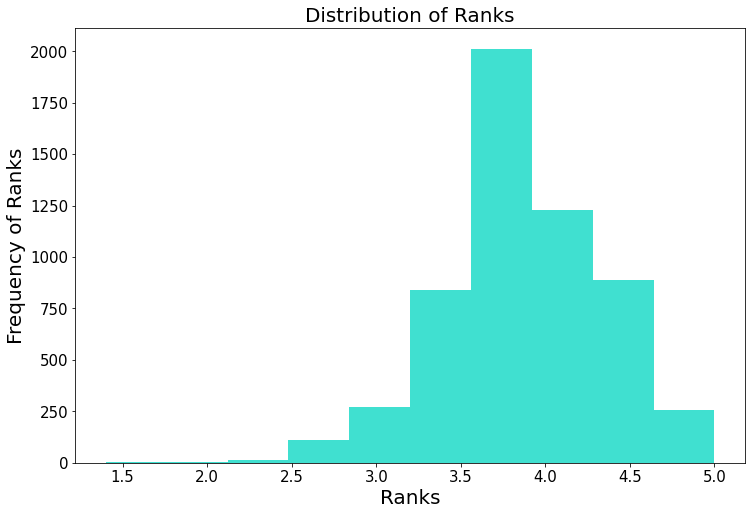

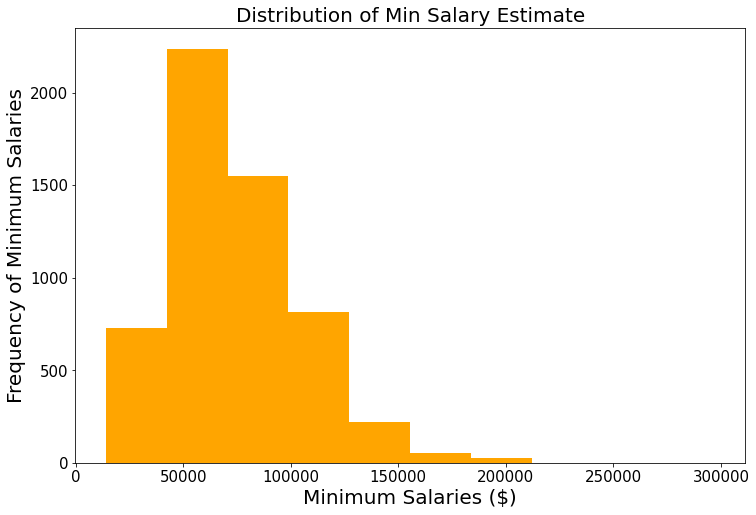

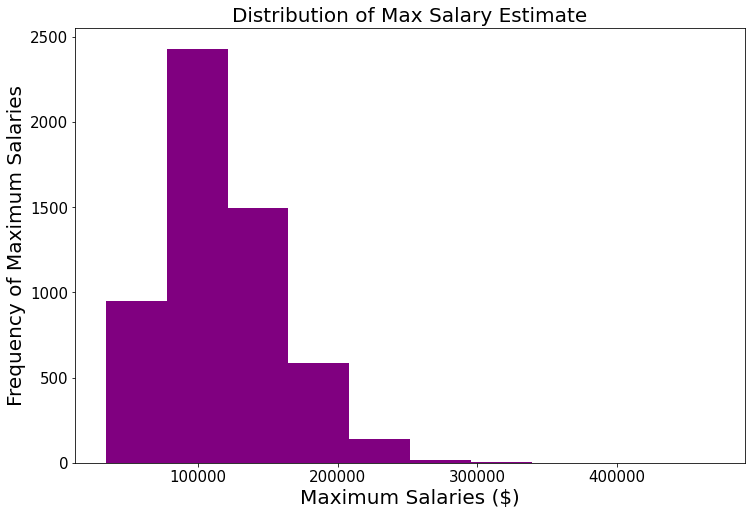

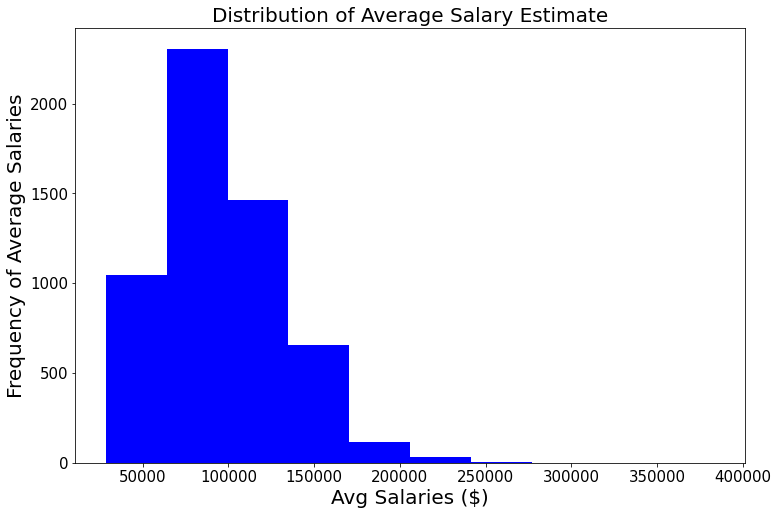

In [30]:
#How are rank, min_salary, max_salary, & avg_sal distributed?
#rank
plt.figure(figsize=(12,8))
plt.hist(jobs_df['rank'], color='turquoise')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Ranks', fontsize = 20)
plt.xlabel('Ranks', fontsize = 20)
plt.ylabel('Frequency of Ranks', fontsize = 20)
plt.show()

#min salary
plt.figure(figsize=(12,8))
plt.hist(jobs_df['min_sal'], color='orange')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Min Salary Estimate', fontsize = 20)
plt.xlabel('Minimum Salaries ($)', fontsize = 20)
plt.ylabel('Frequency of Minimum Salaries', fontsize = 20)
plt.show()

#max salary
plt.figure(figsize=(12,8))
plt.hist(jobs_df['max_sal'], color='purple')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Max Salary Estimate', fontsize = 20)
plt.xlabel('Maximum Salaries ($)', fontsize = 20)
plt.ylabel('Frequency of Maximum Salaries', fontsize = 20)
plt.show()

#avg salary
plt.figure(figsize=(12,8))
plt.hist(jobs_df['avg_sal'], color='blue')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Average Salary Estimate', fontsize = 20)
plt.xlabel('Avg Salaries ($)', fontsize = 20)
plt.ylabel('Frequency of Average Salaries', fontsize = 20)
plt.show()

**Conclusion**

All numeric columns seem to have somewhat of a normal distribution. There may be some skewness to each but overall the bell shape is there. 

#### **Salary Spread by Search City**

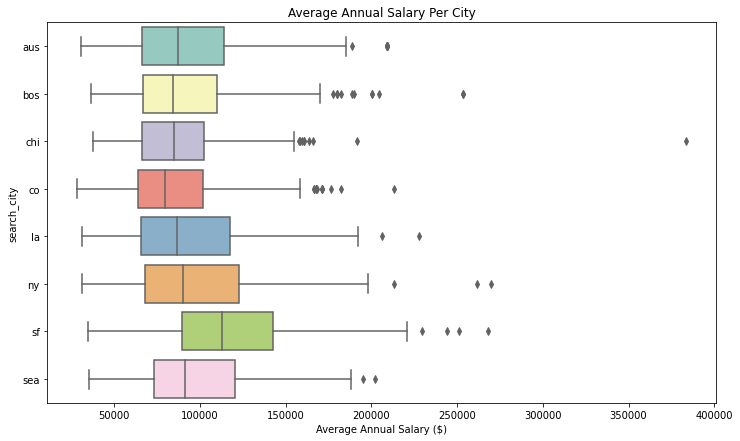

In [31]:
#how are salaries spread per city?
plt.figure(figsize=(12,7))
sns.boxplot(x='avg_sal', y='search_city', data= jobs_df, palette = 'Set3')
plt.xlabel('Average Annual Salary ($)')
plt.title('Average Annual Salary Per City')
plt.show()

#### **Salary Spread by Search Job**

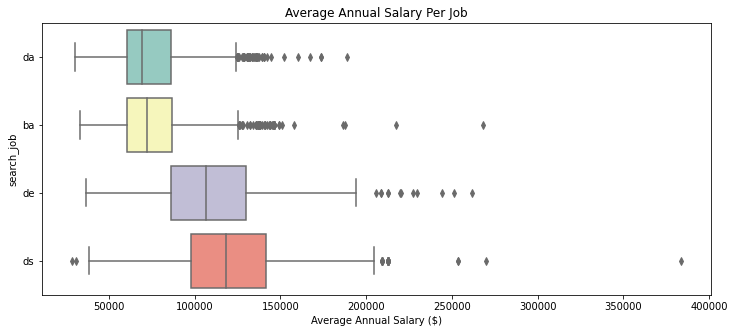

In [32]:
#how are salaries spread per job?
plt.figure(figsize=(12,5))
sns.boxplot(x='avg_sal', y='search_job', data= jobs_df, palette = 'Set3')
plt.xlabel('Average Annual Salary ($)')
plt.title('Average Annual Salary Per Job')
plt.show()

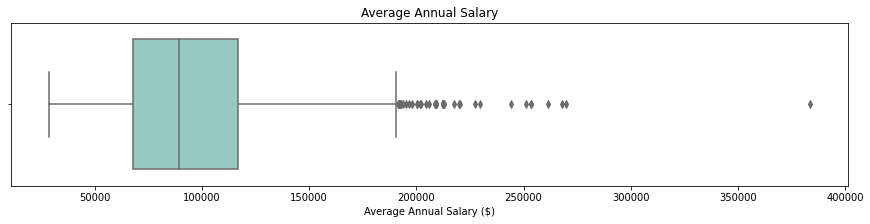

In [33]:
#how are average salaries spread?
plt.figure(figsize=(15,3))
sns.boxplot(x='avg_sal', data= jobs_df, palette = 'Set3')
plt.xlabel('Average Annual Salary ($)')
plt.title('Average Annual Salary')
plt.show()

#### **How many jobs from each search_job?**

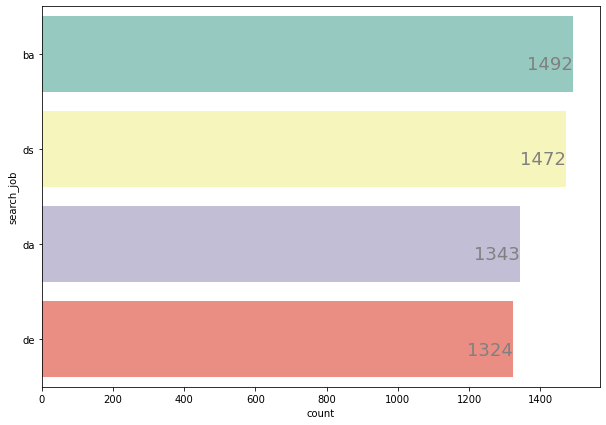

In [34]:
#How many jobs from each search_job?
plt.figure(figsize=(10,7))
ax = sns.countplot(y='search_job', palette='Set3',data=jobs_df,
  order=jobs_df['search_job'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_width()}', xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(0, 0), textcoords='offset points', ha='right', va='center', 
            color = 'gray', size = 18)
plt.show()

#### **How many jobs per scrape date?**

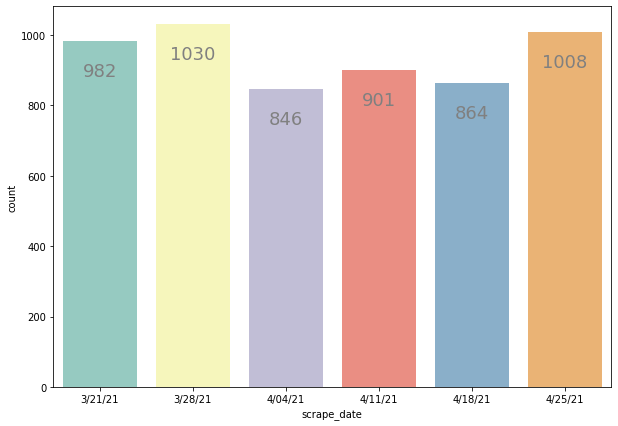

In [35]:
#Most Popular Job Titles
plt.figure(figsize=(10,7))
ax = sns.countplot(x='scrape_date', palette='Set3',data=jobs_df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='gray', size=18)
plt.show()

#### **Most Popular Job Titles**

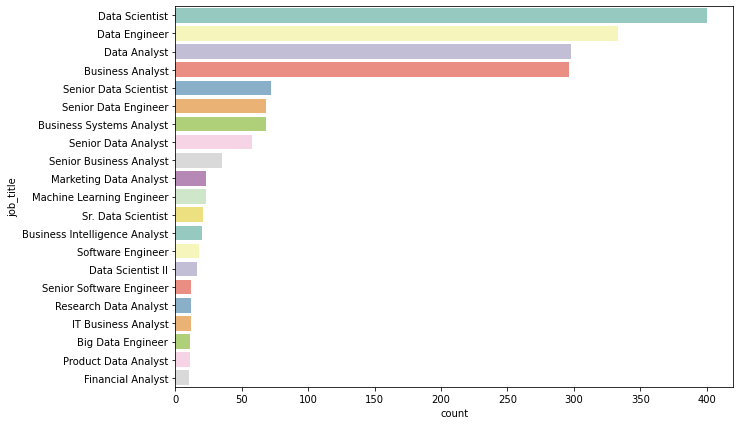

In [36]:
#Most Popular Job Titles
plt.figure(figsize=(10,7))
sns.countplot(y='job_title', palette='Set3',data=jobs_df,
  order=jobs_df['job_title'].value_counts().iloc[:21].index)
plt.show()

#### **Most Popular Search Cities**

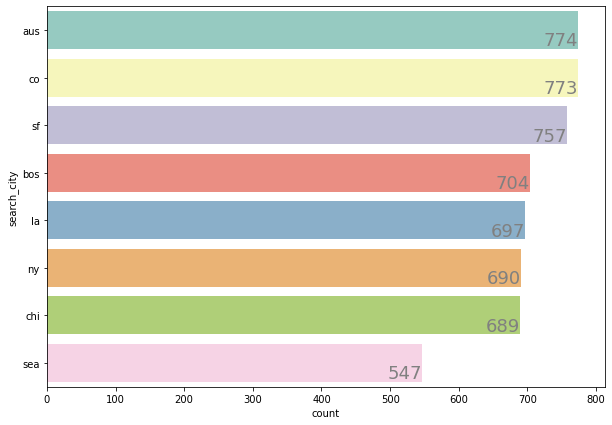

In [37]:
#Most Popular Search City
plt.figure(figsize=(10,7))
ax= sns.countplot(y='search_city', palette='Set3',data=jobs_df,
  order=jobs_df['search_city'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_width()}', xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(0, 0), textcoords='offset points', ha='right', va='center', 
            color = 'gray', size = 18)
plt.show()

#### **Most Popular States**

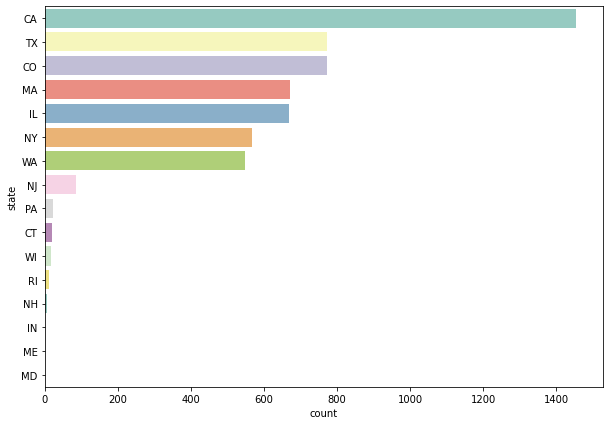

In [38]:
#Most Popular State
plt.figure(figsize=(10,7))
sns.countplot(y='state', palette='Set3',data=jobs_df,
  order=jobs_df['state'].value_counts().index)
plt.show()

#### **Glassdoor Salary Estimates vs. Employer Salary Estimates**

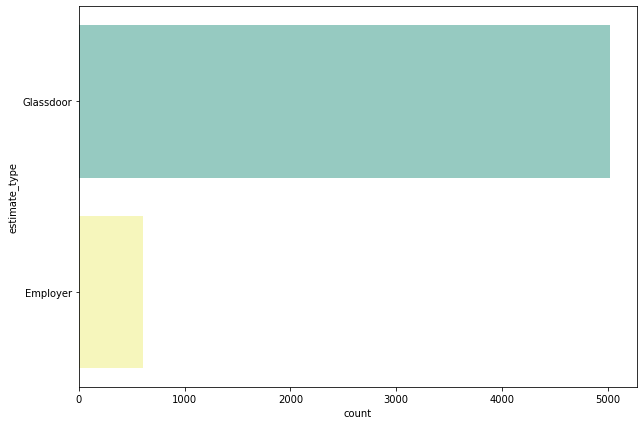

In [39]:
#Estimate Types
plt.figure(figsize=(10,7))
sns.countplot(y='estimate_type', palette='Set3',data=jobs_df,
  order=jobs_df['estimate_type'].value_counts().index)
plt.show()

#### **Most Popular Companies**

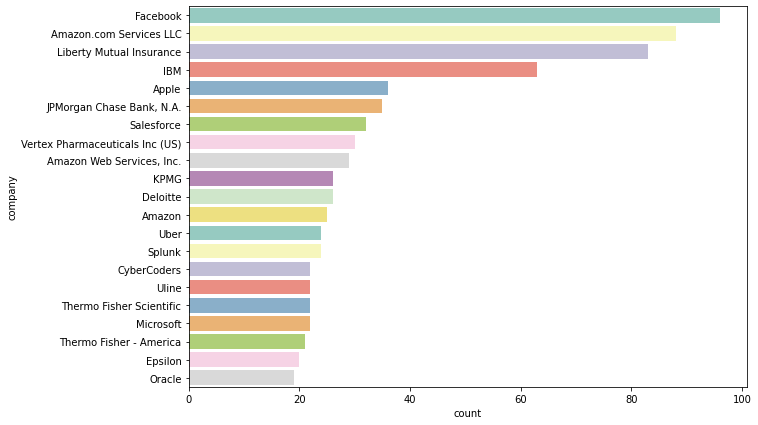

In [40]:
#Most Popular Companies
plt.figure(figsize=(10,7))
sns.countplot(y='company', palette='Set3',data=jobs_df,
  order=jobs_df['company'].value_counts().iloc[:21].index)
plt.show()

#### **Most Popular Industries**

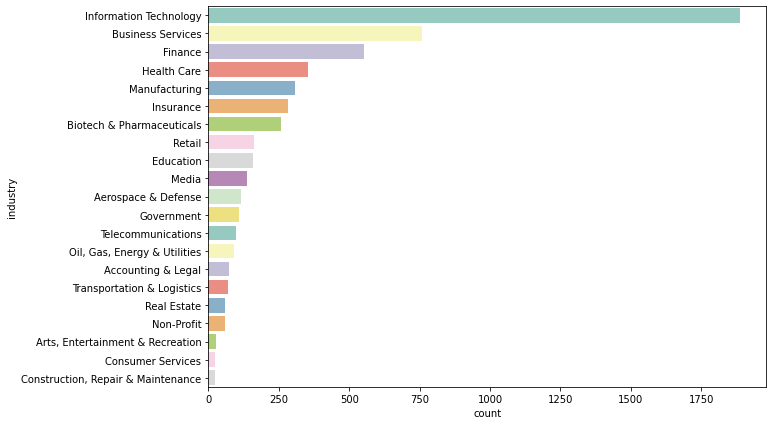

In [41]:
#Most Popular Industries
plt.figure(figsize=(10,7))
sns.countplot(y='industry', palette='Set3',data=jobs_df,
  order=jobs_df['industry'].value_counts().iloc[:21].index)
plt.show()

#### **Job Description Word Cloud**

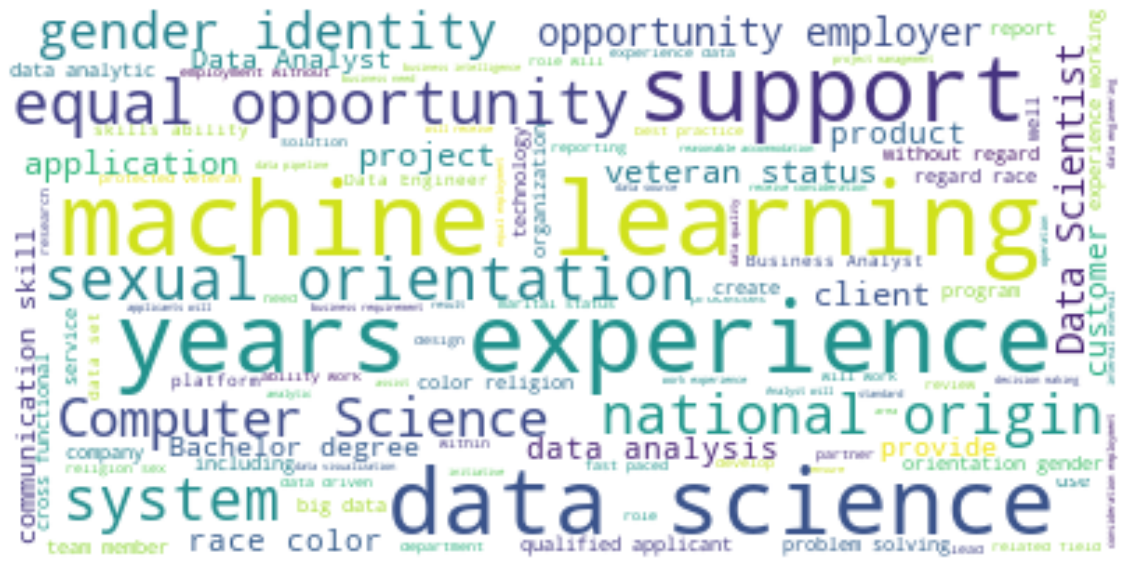

In [42]:
#most popular words in job_description
# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(" ".join(jobs_df['description']))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

While removal of common words is still neccessary, it seems removal or exclusion of the disclosures about race, gender, religion, disability, and veteran status may also be necessary.

### **Description Text Cleaning**

In [43]:
#make a df of just job_titles & descriptions

#create a function to clean the job_titles
def job_title_cleaning(text):
  #lowercase all letters
  text = text.lower()
  #change sr. to senior
  text = re.sub('sr.', 'senior', text)
  return text

#reg expression that will apply cleaning
round0 = lambda x: job_title_cleaning(x)

#create the df & apply cleaning to job_title
desc_df = pd.DataFrame(jobs_df.job_title.apply(round0))

#add descriptions to the df
desc_df['description'] =jobs_df['description']

desc_df.head()

,job_title,description
0,data analyst senior,Equivalent ExperienceDescription:Day to Day Re...
1,data analyst (gis),Summary/Objective:Execute transactions/tickets...
2,elint data analyst,Job DescriptionCACI delivers industry leading ...
3,data analyst,Online shopping has changed. Today’s eCommerce...
4,data analyst,Company DescriptionPublicis Sapient is a digit...


#### **Text Formatting**

In [44]:
#create a function for first round of description cleaning
def text_cleaning(text):
  #change all lowercase letters followed by uppercase letters to include a space in between
  text = re.sub('(?<=[a-z])(?=[A-Z])', ' \g<0>', text)
  #replace / with a space
  text = re.sub('/', ' ', text)
  #make all lowercase letters
  text = text.lower()
  #put a space between any numbers adjacent to a letter
  text = re.sub('(?<=[0-9])(?=[a-z])',' \g<0>', text)
  #remove  characters
  text = re.sub('', '', text)
  #convert + to plus
  text = re.sub('[+]', 'plus', text)
  #remove brackets
  text = re.sub('\[.*?\]', '', text)
  #replace: with a pace
  text = re.sub(':', ' ', text)
  #remove punctuation
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  #remove \n\n
  text = re.sub('\n\n', ' ', text)
  #remove quotation marks
  text = re.sub('[‘’“”…]', '', text)
  #change years to year
  text = re.sub('years', 'year', text)
  #change yrs to year
  text = re.sub('yrs', 'year', text)
  #change yr to year
  text = re.sub('yr', 'year', text)
  #chagnge experienceworking to experience
  text = re.sub('experienceworking', 'experience', text)
  #add a space after word degree
  text = re.sub('degree', 'degree ', text)
  #change ba to bachelors
  text = re.sub(' ba ', 'bachelors', text)
  #change bs to bachelors
  text = re.sub(' bs ', 'bachelors', text)
  #change ma to masters
  text = re.sub(' ma ', 'masters', text)
  #change ms to masters
  text = re.sub(' ms ', 'masters', text)
  #change doctoral to doctorate
  text = re.sub('doctoral', 'doctorate', text)
  #change doctorates to doctorate
  text = re.sub('doctorates', 'doctorate', text)
  #change phd to doctorate
  text = re.sub('phd', 'doctorate', text)
  #change artificial intelligence to ai
  text = re.sub('artificial intelligence', 'ai', text)
  #change natural language to nlp
  text = re.sub('natural language', 'nlp', text)
  #change nltk to nlp
  text = re.sub('nltk', 'nlp', text)
  #change machine learning to ml
  text = re.sub('machine learning', 'ml', text)
  #change mysql to sql
  text = re.sub('mysql', 'sql', text)
  #change postgresql to sql
  text = re.sub('postgresql', 'sql', text)
  #change ab testing to hypothesis testing
  text = re.sub('ab testing', 'hypothesis testing', text)
  #change dashboards to dashboard
  text = re.sub('dashboards', 'dashboard', text)
  #change dashboarding to dashboard
  text = re.sub('dashboarding', 'dashboard', text)
  #change handson analytic to nothing
  text = re.sub('handson analytic', '', text)
  #change data development to nothing
  text = re.sub('data development', '', text)
  #add space after word requirements
  text = re.sub('requirements', 'requirements ', text)
  return text

round1 = lambda x: text_cleaning(x)

In [45]:
#view updated descriptions
clean_desc = pd.DataFrame(desc_df.description.apply(round1))
clean_desc['job_title'] = desc_df['job_title']
clean_desc.head(20)

,description,job_title
0,equivalent experience description day to day r...,data analyst senior
1,summary objective execute transactions tickets...,data analyst (gis)
2,job description caci delivers industry leading...,elint data analyst
3,online shopping has changed todays e commerce ...,data analyst
4,company description publicis sapient is a digi...,data analyst
5,about gmtheres never been a more exciting time...,data analyst
6,about us at cloudflare we have our eyes set on...,data analyst
7,data analyst high tech product enablement pla...,"data analyst, high tech product & enablement p..."
8,summary posted dec 18 2020 weekly hours 40 r...,business analyst - strategic data solutions
9,vets ez veterans ez info inc a verified servic...,data analyst (remote opportunity)


In [46]:
clean_desc.head(20)

,description,job_title
0,equivalent experience description day to day r...,data analyst senior
1,summary objective execute transactions tickets...,data analyst (gis)
2,job description caci delivers industry leading...,elint data analyst
3,online shopping has changed todays e commerce ...,data analyst
4,company description publicis sapient is a digi...,data analyst
5,about gmtheres never been a more exciting time...,data analyst
6,about us at cloudflare we have our eyes set on...,data analyst
7,data analyst high tech product enablement pla...,"data analyst, high tech product & enablement p..."
8,summary posted dec 18 2020 weekly hours 40 r...,business analyst - strategic data solutions
9,vets ez veterans ez info inc a verified servic...,data analyst (remote opportunity)


#### **Excluding Stopwords**

In [47]:
#set stop_words
stop_words = nltk.corpus.stopwords.words('english')

#add some words to stop_words
new_stop_words = ['combined', 'related', 'working', 'overall', 'work', 'more', 
               'recent', 'professional', 'relevant', 'industry']

for word in new_stop_words:
  stop_words.append(word)

#filter out all stop words
cleaned_desc = pd.DataFrame(data = (clean_desc['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))))

cleaned_desc['job_title'] = clean_desc['job_title']
cleaned_desc.head()

,description,job_title
0,equivalent experience description day day resp...,data analyst senior
1,summary objective execute transactions tickets...,data analyst (gis)
2,job description caci delivers leading signals ...,elint data analyst
3,online shopping changed todays e commerce runs...,data analyst
4,company description publicis sapient digital t...,data analyst


#### **Most Popular Words WordCloud**

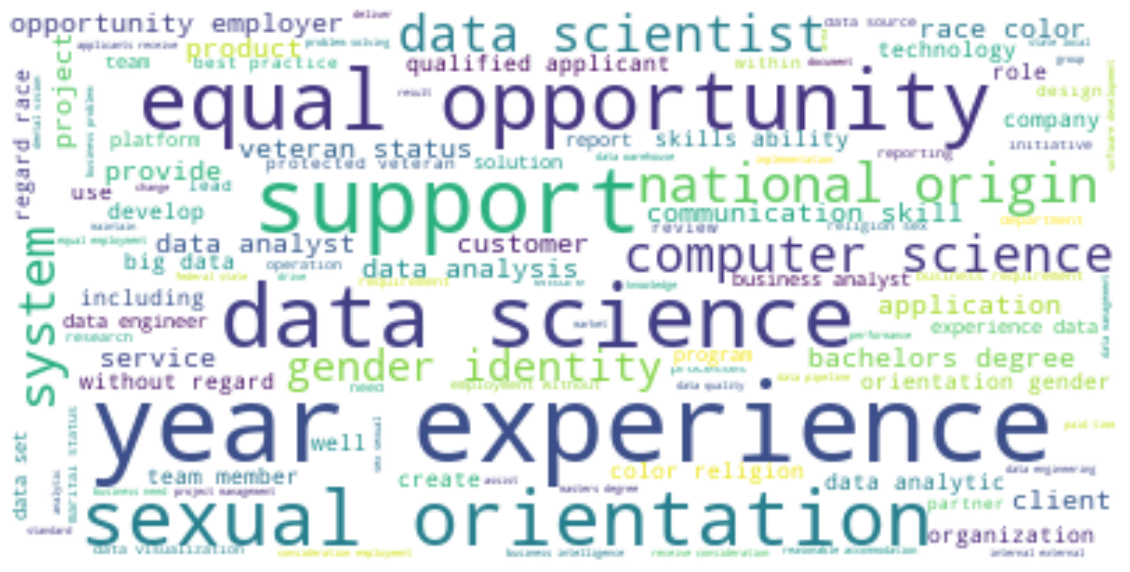

In [48]:
#most popular words in job_description
wordcloud = WordCloud(background_color='white').generate(" ".join(cleaned_desc['description']))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

The cleaned descriptions still contain several irrelevant words. Let's stop cleaning the text here and focus efforts on extracting pieces of information from the description with regular expressions.

### **Description Text Extraction**

#### **Text Extraction Function**

In [49]:
#function to return which option(s) form a defined pattern a descrription contains
def pattern_searcher(search_str:str, search_list:str):
    search_obj = re.search(search_list, search_str)
    if search_obj :
        return_str = search_str[search_obj.start(): search_obj.end()]
    else:
        return_str = 'NA'
    return return_str

#### **Extract Years of Experience**

In [50]:
#make a column to see if description has certain degree

years_exp = [
'6 months experience'
'1 year experience',
'one year experience',
'1plus year experience',
'oneplus year experience',
'1 plus year experience',
'one plus year experience',
'one more year experience'
'1plus year',
'oneplus year',
'1 plus year',
'one plus year',
'one year',
'1 year',
'1plus experience',
'oneplus experience',
'1 plus experience',
'one plus experience',
'2 year experience',
'two year experience',
'2plus year experience',
'twoplus year experience',
'2 plus year experience',
'two plus year experience',
'two more year experience',
'twoplus year',
'2plus year',
'two plus year',
'2 plus year',
'two year',
'2 year',
'2plus experience',
'twoplus experience',
'2 plus experience',
'two plus experience',
'3 year experience',
'35 year experience',
'three year experience',
'3plus year experience',
'threeplus year experience',
'3 plus year experience',
'three plus year experience',
'three more year experience',
'3plus year',
'threeplus year',
'3 plus year',
'three plus year',
'three year',
'3 year',
'3plus experience',
'threeplus experience',
'3 plus experience',
'three plus experience',
'4 year experience',
'four year experience',
'4plus year experience',
'fourplus year experience',
'4 plus year experience',
'four plus year experience',
'four more year experience',
'4plus year',
'fourplus year',
'4 plus year',
'four plus year',
'four year',
'4 year',
'4plus experience',
'fourplus experience',
'4 plus experience',
'four plus experience',
'5 year experience',
'five year experience',
'5plus year experience',
'fiveplus year experience',
'5 plus year experience',
'five plus year experience',
'five more year experience',
'5plus year',
'fiveplus year',
'5 plus year',
'five plus year',
'five year',
'5 year',
'5plus experience',
'fiveplus experience',
'5 plus experience',
'five plus experience',
'57 experience',
'6 year experience',
'six year experience',
'6plus year',
'sixplus year',
'6 plus year',
'six plus year',
'6plus year experience',
'sixplus year experience',
'6 plus year experience',
'six plus year experience',
'six more year experience',
'six year',
'6 year',
'6plus experience',
'sixplus experience',
'6 plus experience',
'six plus experience',
'7 year experience',
'seven year experience',
'7plus year experience',
'sevenplus year experience',
'7 plus year experience',
'seven plus year experience',
'seven more year experience',
'710 year experience',
'7plus year',
'sevenplus year',
'7 plus year',
'seven plus year',
'seven year',
'7 year',
'7plus experience',
'sevenplus experience',
'7 plus experience',
'seven plus experience',
'8 year experience',
'eight year experience',
'8plus year experience',
'eightplus year experience',
'8 plus year experience',
'eight plus year experience',
'eight more year experience',
'8plus year',
'eightplus year',
'8 plus year',
'eight plus year',
'eight year',
'8 year',
'8plus experience',
'eightplus experience',
'8 plus experience',
'eight plus experience',
'9 year experience',
'nine year experience',
'9plus year experience',
'nineplus year experience',
'9 plus year experience',
'nine plus year experience',
'nine more year experience',
'9plus year',
'nineplus year',
'9 plus year',
'nine plus year',
'nine year',
'9 year',
'9plus experience',
'nineplus experience',
'9 plus experience',
'nine plus experience',
'10 year experience',
'ten year experience',
'10plus year experience',
'tenplus year experience',
'10 plus year experience',
'ten plus year experience',
'ten more year experience',
'10plus year',
'tenplus year',
'10 plus year',
'ten plus year',
'ten year',
'10 year',
'10plus experience',
'tenplus experience',
'10 plus experience',
'ten plus experience'
]

#create a pattern
exp_pattern = '|'.join([f'(?i){year}' for year in years_exp])

#make a new column in jobs_df to represent which degree(s) a post mentions
cleaned_desc['years_exp'] = cleaned_desc['description'].apply(lambda x: pattern_searcher(search_str=x, search_list=exp_pattern))
cleaned_desc

,description,job_title,years_exp
0,equivalent experience description day day resp...,data analyst senior,3 year experience
1,summary objective execute transactions tickets...,data analyst (gis),1 year
2,job description caci delivers leading signals ...,elint data analyst,7 year experience
3,online shopping changed todays e commerce runs...,data analyst,3plus year experience
4,company description publicis sapient digital t...,data analyst,8plus year experience
...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5plus year
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10plus year
5628,notes university washington following physical...,research scientist/engineer 1,1 year
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7plus year


In [51]:
cleaned_desc['years_exp'][82] = '1plus year'

In [52]:
#check how many observations are NA
cleaned_desc_na = cleaned_desc['years_exp'] == 'NA'
cleaned_desc.iloc[cleaned_desc_na.values]

,description,job_title,years_exp
6,us cloudflare eyes set ambitious goal help bui...,data analyst,NA
13,introduction ibm job calling build design code...,data analyst (remediation),NA
15,momentum solar premier residential solar provi...,solar data analyst,NA
18,job summary commercial junior data analyst ass...,cmcrl jr. data analyst,NA
21,summary data analyst position member nfps fina...,data analyst ii,NA
...,...,...,...
5603,liberty mutual purpose help people embrace tod...,experienced data engineer,NA
5606,passionate facebooks product analytics technol...,"data scientist, analytics (university grad)",NA
5611,summary posted apr 8 2021 role number 20001821...,"ai/ml - machine learning scientist, siri under...",NA
5612,applied data scientist 4232021 astrum u – comp...,applied data scientist,NA


In [53]:
#change years_exp to one specific number or NA value
six_mos = ['6 months experience']

one_year = ['1 year experience','one year experience','1plus year experience',
'oneplus year experience','1 plus year experience','one plus year experience',
'one more year experience''1plus year','oneplus year','1 plus year',
'one plus year','one year','1 year','1plus experience','oneplus experience',
'1 plus experience','one plus experience']

two_years = ['2 year experience','two year experience','2plus year experience',
'twoplus year experience','2 plus year experience','two plus year experience',
'two more year experience','twoplus year','2plus year','two plus year',
'2 plus year','two year','2 year','2plus experience','twoplus experience',
'2 plus experience','two plus experience']

three_years = ['3 year experience','35 year experience','three year experience',
'3plus year experience','threeplus year experience','3 plus year experience',
'three plus year experience','three more year experience','3plus year',
'threeplus year','3 plus year','three plus year','three year','3 year',
'3plus experience','threeplus experience','3 plus experience',
'three plus experience']

four_years = ['4 year experience','four year experience','4plus year experience',
'fourplus year experience','4 plus year experience','four plus year experience',
'four more year experience','4plus year','fourplus year','4 plus year',
'four plus year','four year','4 year','4plus experience','fourplus experience',
'4 plus experience','four plus experience']

five_years = ['5 year experience','five year experience','5plus year experience',
'fiveplus year experience','5 plus year experience','five plus year experience',
'five more year experience','5plus year','fiveplus year','5 plus year',
'five plus year','five year','5 year','5plus experience','fiveplus experience',
'5 plus experience','five plus experience','57 experience']

six_years = ['6 year experience','six year experience','6plus year',
'sixplus year','6 plus year','six plus year','6plus year experience',
'sixplus year experience','6 plus year experience','six plus year experience',
'six more year experience','six year','6 year','6plus experience',
'sixplus experience','6 plus experience','six plus experience']

seven_years = ['7 year experience','seven year experience','7plus year experience',
'sevenplus year experience','7 plus year experience','seven plus year experience',
'seven more year experience','710 year experience','7plus year','sevenplus year',
'7 plus year','seven plus year','seven year','7 year','7plus experience',
'sevenplus experience','7 plus experience','seven plus experience']

eight_years = ['8 year experience','eight year experience',
'8plus year experience','eightplus year experience','8 plus year experience',
'eight plus year experience','eight more year experience','8plus year',
'eightplus year','8 plus year','eight plus year','eight year','8 year',
'8plus experience','eightplus experience','8 plus experience',
'eight plus experience']

nine_years = ['9 year experience','nine year experience','9plus year experience',
'nineplus year experience','9 plus year experience','nine plus year experience',
'nine more year experience','9plus year','nineplus year','9 plus year',
'nine plus year','nine year','9 year','9plus experience','nineplus experience',
'9 plus experience','nine plus experience']

ten_years = ['10 year experience','ten year experience','10plus year experience',
'tenplus year experience','10 plus year experience','ten plus year experience',
'ten more year experience','10plus year','tenplus year','10 plus year',
'ten plus year','ten year','10 year','10plus experience','tenplus experience',
'10 plus experience','ten plus experience']

cleaned_desc['years_exp'] = cleaned_desc['years_exp'].apply(lambda x:0.5 if x in six_mos else 1 if x in one_year else 2 if x in two_years else 3 if x in three_years else 4 if x in four_years else 5 if x in five_years else 6 if x in six_years else 7 if x in seven_years else 8 if x in eight_years else 9 if x in nine_years else 10 if x in ten_years else -1)
cleaned_desc

,description,job_title,years_exp
0,equivalent experience description day day resp...,data analyst senior,3
1,summary objective execute transactions tickets...,data analyst (gis),1
2,job description caci delivers leading signals ...,elint data analyst,7
3,online shopping changed todays e commerce runs...,data analyst,3
4,company description publicis sapient digital t...,data analyst,8
...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10
5628,notes university washington following physical...,research scientist/engineer 1,1
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7


In [54]:
#create a df for nlp analysis in a separate notebook
# nlp_desc = pd.DataFrame()
# nlp_desc['description'] = cleaned_desc['description']
# nlp_desc['avg_sal'] = jobs_df['avg_sal']
# nlp_desc

**Note**

Since we found around 84% of the postings mentioning years of experience, analysis may contain model testing on one dataframe that includes years of experience and on others that would contain less data, without years of experience. Correlation of avg_sal & years of experience will tell us which route is appropriate.

#### **Extract Degrees**

In [55]:
#make a column to see if description has certain degree
degrees = ['associates', 'bachelors', 'masters', 'doctorate']

for degree in degrees:
  cleaned_desc[degree] = clean_desc['description'].apply(lambda x: 1 if degree in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0
...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0


#### **Extract Senior Job Titles**

In [56]:
senior_lead = ['senior', 'lead', 'principal', 'manager']
for item in senior_lead:
  cleaned_desc[item] = clean_desc['job_title'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0


In [57]:
#check if any of the senior job titles are all 0
cleaned_desc[['senior', 'lead', 'principal', 'manager']].nunique()

senior       2
lead         2
principal    2
manager      2
dtype: int64

#### **Extract Languages**

In [58]:
languages = ['bash','cplusplus','html','java','javascript','julia','matlab',
'oracle','python',' r ','ruby','sas','scala','sql']
for language in languages:
  cleaned_desc[language] = clean_desc['description'].apply(lambda x: 1 if language in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [59]:
#check if any of the languages are all 0
cleaned_desc[['bash','cplusplus','html','java','javascript','julia','matlab',
'oracle','python',' r ','ruby','sas','scala','sql']].nunique()

bash          2
cplusplus     2
html          2
java          2
javascript    2
julia         2
matlab        2
oracle        2
python        2
 r            2
ruby          2
sas           2
scala         2
sql           2
dtype: int64

#### **Extract Coding Interfaces**

In [60]:
code_interfraces = ['colab','command line','git ','github','jupyter','notebook']
for item in code_interfraces:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,colab,command line,git,github,jupyter,notebook
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [61]:
#check if any of the code interfraces are all 0
cleaned_desc[['colab','command line','git ','github','jupyter','notebook']].nunique()

colab           2
command line    2
git             2
github          2
jupyter         2
notebook        2
dtype: int64

In [62]:
#drop colab from df
cleaned_desc.drop(columns='colab', inplace=True)

#### **Extract Visualization Platforms**

In [63]:
dashboards = ['dashboard','data studio','looker','power bi','sisense','tableau']
for dashboard in dashboards:
  cleaned_desc[dashboard] = clean_desc['description'].apply(lambda x: 1 if dashboard in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
#check if any of the dashboards are all 0
cleaned_desc[['dashboard','data studio','looker','power bi','sisense','tableau']].nunique()

dashboard      2
data studio    2
looker         2
power bi       2
sisense        2
tableau        2
dtype: int64

#### **Extract Big Data Skills**

In [65]:
big_data = ['airflow','big data','bigquery','cassandra','docker','etl','hadoop',
'hbase','hdfs','hive','impala','kafka','kubeflow','kubernetes']
for tool in big_data:
  cleaned_desc[tool] = clean_desc['description'].apply(lambda x: 1 if tool in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,docker,etl,hadoop,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
#check if any of the big data tools had only 1 unique value
cleaned_desc[['airflow','big data','bigquery','cassandra','docker','etl','hadoop',
'hbase','hdfs','hive','impala','kafka','kubeflow','kubernetes']].nunique()

airflow       2
big data      2
bigquery      2
cassandra     2
docker        2
etl           2
hadoop        2
hbase         2
hdfs          2
hive          2
impala        2
kafka         2
kubeflow      2
kubernetes    2
dtype: int64

#### **Extract Cloud Skills**

In [67]:
clouds = ['aws','azure','dynamodb','ec2','gcp','google cloud','lambda','mongodb',
'redshift','s3','saas','snowflake']
for cloud in clouds:
  cleaned_desc[cloud] = clean_desc['description'].apply(lambda x: 1 if cloud in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,docker,etl,hadoop,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
#check if any of the cloud tools are all 0
cleaned_desc[['aws','azure','dynamodb','ec2','gcp','google cloud','lambda','mongodb',
'redshift','s3','saas','snowflake']].nunique()

aws             2
azure           2
dynamodb        1
ec2             2
gcp             2
google cloud    2
lambda          2
mongodb         2
redshift        2
s3              2
saas            2
snowflake       2
dtype: int64

#### **Extract Outside Platform Tools**

In [69]:
platforms = ['google analytics','google sheets','linux','microsoft', 'microsoft excel',
'powerpoint','salesforce']
for item in platforms:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,docker,etl,hadoop,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
#check if any of the outside platform tools are all 0
cleaned_desc[['google analytics','google sheets','linux','microsoft', 'microsoft excel',
'powerpoint','salesforce']].nunique()

google analytics    2
google sheets       2
linux               2
microsoft           2
microsoft excel     2
powerpoint          2
salesforce          2
dtype: int64

#### **Extract Data Science Concepts**

In [71]:
concepts = [' ai ','ajax','api','etl','forecasting','hypothesis testing',
'json','kpi',' ml ','nlp','pipeline','predictive','regression','statistical',
'time series']
for item in concepts:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0


In [72]:
#check if any of the ds concepts are all 0
cleaned_desc[[' ai ','ajax','api','etl','forecasting','hypothesis testing',
'json','kpi',' ml ','nlp','pipeline','predictive','regression','statistical',
'time series']].nunique()

 ai                   2
ajax                  2
api                   2
etl                   2
forecasting           2
hypothesis testing    2
json                  2
kpi                   2
 ml                   2
nlp                   2
pipeline              2
predictive            2
regression            2
statistical           2
time series           2
dtype: int64

#### **Extract Libraries**

In [73]:
libraries = ['matplotlib','numpy','pandas','scikit','seaborn']
for item in libraries:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0


In [74]:
#check if any of the libraries are all 0
cleaned_desc[['matplotlib','numpy','pandas','scikit','seaborn']].nunique()

matplotlib    2
numpy         2
pandas        2
scikit        2
seaborn       2
dtype: int64

#### **Extract Deep Learning Techniques**

In [75]:
deep_learning = ['apache','keras','neural','spark','tensorflow']
for item in deep_learning:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn,apache,keras,neural,spark,tensorflow
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
#check if any of the deeep learning techniques are all 0
cleaned_desc[['apache','keras','neural','spark','tensorflow']].nunique()

apache        2
keras         2
neural        2
spark         2
tensorflow    2
dtype: int64

#### **Extract Web Application Platforms**

In [77]:
web_apps = ['bottle','cherrypy','django','flask','pyramid','quixote',
            'turbogears','web2py']
for item in web_apps:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn,apache,keras,neural,spark,tensorflow,bottle,cherrypy,django,flask,pyramid,quixote,turbogears,web2py
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,team growing excited hiring longterm resource ...,data engineer - marketing (fte) - remote,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5627,looking opportunities deliver innovations bill...,principal data & applied scientist manager,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5628,notes university washington following physical...,research scientist/engineer 1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,challenge looking talented innovative applied ...,staff applied scientist-machine learning,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
#check if any of the web application platforms are all 0
cleaned_desc[['bottle','cherrypy','django','flask','pyramid','quixote',
            'turbogears','web2py']].nunique()

bottle        2
cherrypy      1
django        2
flask         2
pyramid       1
quixote       1
turbogears    1
web2py        1
dtype: int64

In [79]:
cleaned_desc.drop(columns=['cherrypy','pyramid','quixote',
            'turbogears','web2py'], inplace=True)

### **Skills Visualizations**

#### **Most Popular Years of Experience**

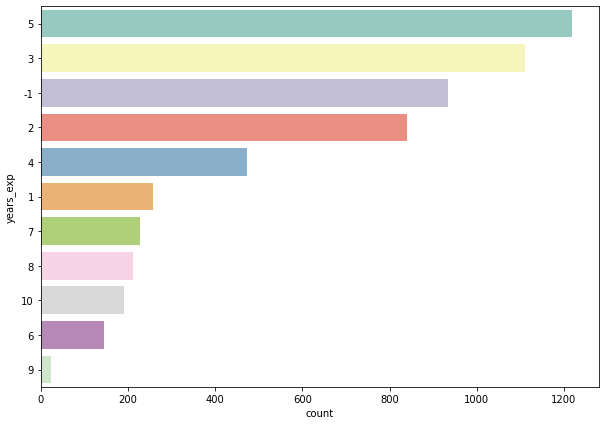

In [80]:
plt.figure(figsize=(10,7))
sns.countplot(y='years_exp', palette='Set3',data=cleaned_desc,
  order=cleaned_desc['years_exp'].value_counts().index)
plt.show()

**Interpretation**

Most job postings did not define years of experience, or we didn't account for them accurattely. However if years of experience were detected, it was most commonly 5 or 3 years of experience.

#### **Most Popular Degrees**

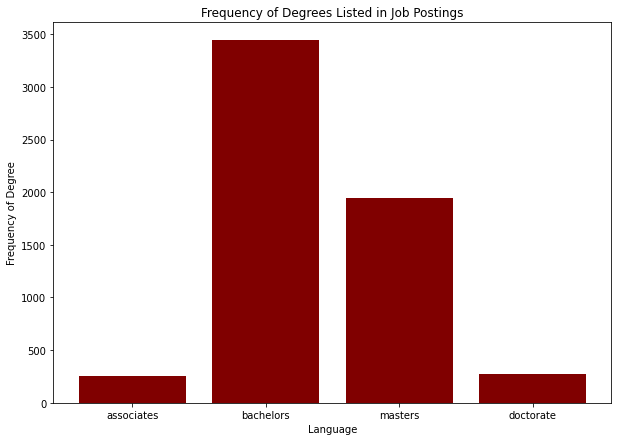

In [81]:
#create a sum of each degree column
associates_sum = sum(cleaned_desc['associates'])
bachelors_sum = sum(cleaned_desc['bachelors'])
masters_sum = sum(cleaned_desc['masters'])
doctorate_sum = sum(cleaned_desc['doctorate'])

#make a dictionary of degree sums so we can plot visualization
degree_sums = {'associates':associates_sum, 'bachelors': bachelors_sum, 
               'masters': masters_sum, 'doctorate': doctorate_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(degree_sums)), list(degree_sums.values()), align='center', color='maroon')
plt.xticks(range(len(degree_sums)), list(degree_sums.keys()))
plt.ylabel('Frequency of Degree')
plt.title('Frequency of Degrees Listed in Job Postings')
plt.xlabel('Language')
plt.show()


**Interpretation**

If a degree is mentioned it's most often a bachelors or masters degree. 

#### **How Many Senior Job Titles?**

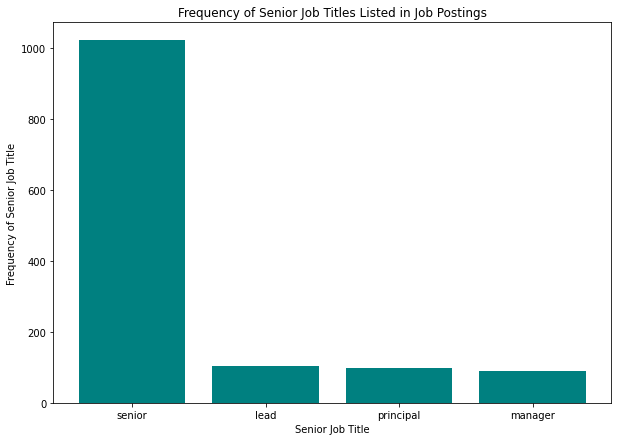

In [82]:
#create a sum of each visualization column
senior_sum = sum(cleaned_desc['senior'])
lead_sum = sum(cleaned_desc['lead'])
principal_sum = sum(cleaned_desc['principal'])
manager_sum = sum(cleaned_desc['manager'])

#make a dictionary of visualization sums so we can plot visualization
title_sums = {'senior':senior_sum, 'lead':lead_sum, 'principal':principal_sum,
              'manager':manager_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(title_sums)), list(title_sums.values()), align='center', color='teal')
plt.xticks(range(len(title_sums)), list(title_sums.keys()))
plt.ylabel('Frequency of Senior Job Title')
plt.title('Frequency of Senior Job Titles Listed in Job Postings')
plt.xlabel('Senior Job Title')
plt.show()

**Interpretation**

About 20% of jobs had senior in the title and much fewer had lead, principal, or manager.

#### **Most Popular Languages**

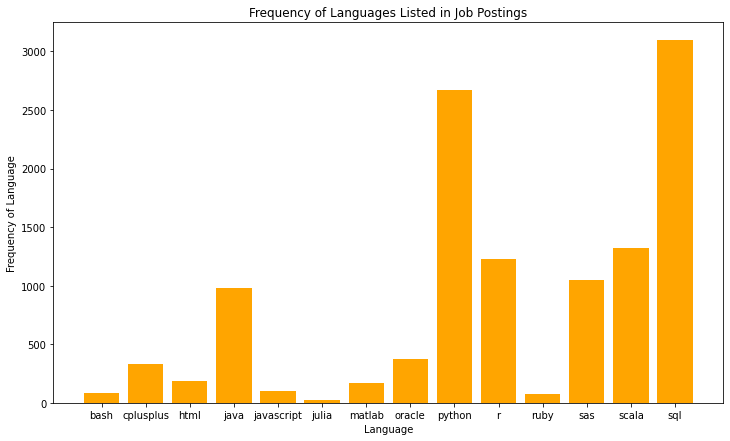

In [83]:
#create a sum of each language column
bash_sum = sum(cleaned_desc['bash'])
cplusplus_sum = sum(cleaned_desc['cplusplus'])
html_sum = sum(cleaned_desc['html'])
java_sum = sum(cleaned_desc['java'])
javascript_sum = sum(cleaned_desc['javascript'])
julia_sum = sum(cleaned_desc['julia'])
matlab_sum = sum(cleaned_desc['matlab'])
oracle_sum = sum(cleaned_desc['oracle'])
python_sum = sum(cleaned_desc['python'])
r_sum = sum(cleaned_desc[' r '])
ruby_sum = sum(cleaned_desc['ruby'])
sas_sum = sum(cleaned_desc['sas'])
scala_sum = sum(cleaned_desc['scala'])
sql_sum = sum(cleaned_desc['sql'])

#make a dictionary of language sums so we can plot visualization
language_sums = {'bash':bash_sum,'cplusplus': cplusplus_sum,'html':html_sum,
'java':java_sum,'javascript':javascript_sum,'julia':julia_sum,'matlab':matlab_sum,
'oracle': oracle_sum,'python':python_sum,'r':r_sum, 'ruby':ruby_sum, 
'sas':sas_sum,'scala':scala_sum,'sql':sql_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(language_sums)), list(language_sums.values()), align='center', color='orange')
plt.xticks(range(len(language_sums)), list(language_sums.keys()))
plt.ylabel('Frequency of Language')
plt.title('Frequency of Languages Listed in Job Postings')
plt.xlabel('Language')
plt.show()

**Interpretation**

The most important languages to have are sql and python but java, r, sas, and scala were mentioned somewhat frequently as well.  

#### **Most Popular Coding Interfaces**

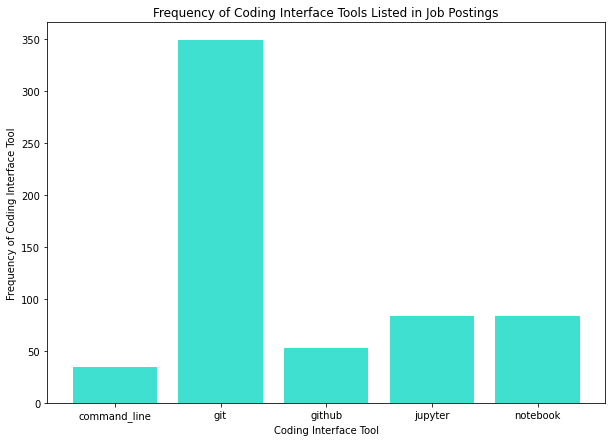

In [84]:
#create a sum of each coding interface column
command_line_sum = sum(cleaned_desc['command line'])
git_sum = sum(cleaned_desc['git '])
github_sum = sum(cleaned_desc['github'])
jupyter_sum = sum(cleaned_desc['jupyter'])
notebook_sum = sum(cleaned_desc['notebook'])

#make a dictionary of coding interface sums so we can plot visualization
vis_sums = {'command_line':command_line_sum, 'git':git_sum, 
'github': github_sum, 'jupyter': jupyter_sum,'notebook': notebook_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(vis_sums)), list(vis_sums.values()), align='center', color='turquoise')
plt.xticks(range(len(vis_sums)), list(vis_sums.keys()))
plt.ylabel('Frequency of Coding Interface Tool')
plt.title('Frequency of Coding Interface Tools Listed in Job Postings')
plt.xlabel('Coding Interface Tool')
plt.show()

**Interpretation**

Coding interfaces are mentioned infrequently. 

#### **Most Popular Visualization Tools**

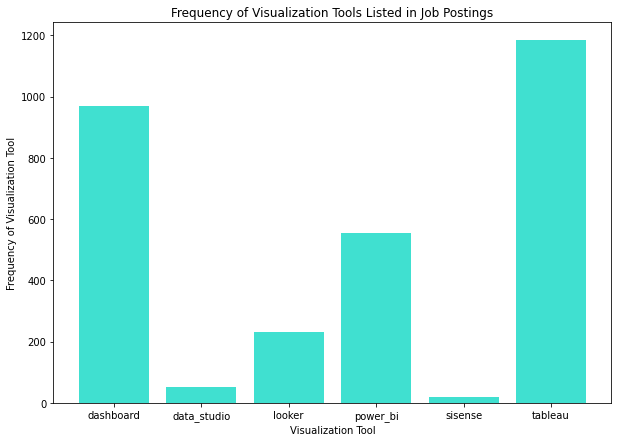

In [85]:
#create a sum of each visualization column
dashboard_sum = sum(cleaned_desc['dashboard'])
data_studio_sum = sum(cleaned_desc['data studio'])
looker_sum = sum(cleaned_desc['looker'])
power_bi_sum = sum(cleaned_desc['power bi'])
sisense_sum = sum(cleaned_desc['sisense'])
tableau_sum = sum(cleaned_desc['tableau'])

#make a dictionary of visualization sums so we can plot visualization
vis_sums = {'dashboard': dashboard_sum,'data_studio': data_studio_sum,
'looker': looker_sum,'power_bi': power_bi_sum,'sisense': sisense_sum,
'tableau': tableau_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(vis_sums)), list(vis_sums.values()), align='center', color='turquoise')
plt.xticks(range(len(vis_sums)), list(vis_sums.keys()))
plt.ylabel('Frequency of Visualization Tool')
plt.title('Frequency of Visualization Tools Listed in Job Postings')
plt.xlabel('Visualization Tool')
plt.show()

**Interpretation**

If a dashboarding tool is mentioned, tableau is most often the tool of choice followed by dashboard in general. 

#### **Most Popular Big Data Skills**

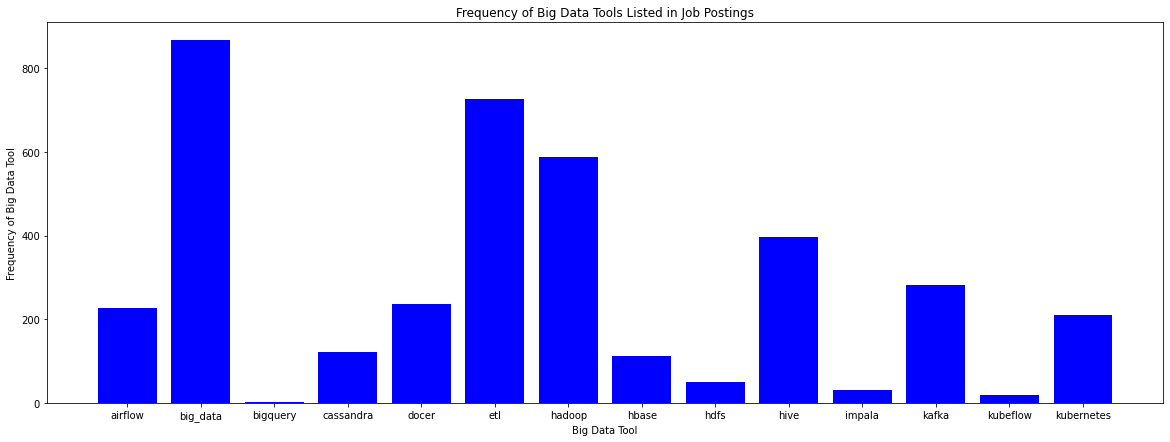

In [86]:
#create a sum of each big data column
airflow_sum = sum(cleaned_desc['airflow'])
big_data_sum = sum(cleaned_desc['big data'])
bigquery_sum = sum(cleaned_desc['bigquery'])
cassandra_sum = sum(cleaned_desc['cassandra'])
docker_sum = sum(cleaned_desc['docker'])
etl_sum = sum(cleaned_desc['etl'])
hadoop_sum = sum(cleaned_desc['hadoop'])
hbase_sum = sum(cleaned_desc['hbase'])
hdfs_sum = sum(cleaned_desc['hdfs']) 
hive_sum = sum(cleaned_desc['hive']) 
impala_sum = sum(cleaned_desc['impala'])
kafka_sum = sum(cleaned_desc['kafka'])
kubeflow_sum = sum(cleaned_desc['kubeflow'])
kubernetes_sum = sum(cleaned_desc['kubernetes'])

#make a dictionary of big data sums so we can plot visualization
big_data_sums = {'airflow': airflow_sum,'big_data': big_data_sum,
'bigquery': bigquery_sum,'cassandra': cassandra_sum, 'docer':docker_sum,'etl': etl_sum,
'hadoop': hadoop_sum,'hbase': hbase_sum,'hdfs': hdfs_sum,'hive': hive_sum,
'impala': impala_sum,'kafka': kafka_sum,'kubeflow': kubeflow_sum,
'kubernetes': kubernetes_sum}

plt.figure(figsize=(20,7))
plt.bar(range(len(big_data_sums)), list(big_data_sums.values()), align='center', color='blue')
plt.xticks(range(len(big_data_sums)), list(big_data_sums.keys()))
plt.ylabel('Frequency of Big Data Tool')
plt.title('Frequency of Big Data Tools Listed in Job Postings')
plt.xlabel('Big Data Tool')
plt.show()

**Interpretation**

Big data skills aren't mentioned in most jobs but if they are, big data and etl are in general is mentioned, and most popular specific tool is hadoop.

#### **Most Popular Cloud Skills**

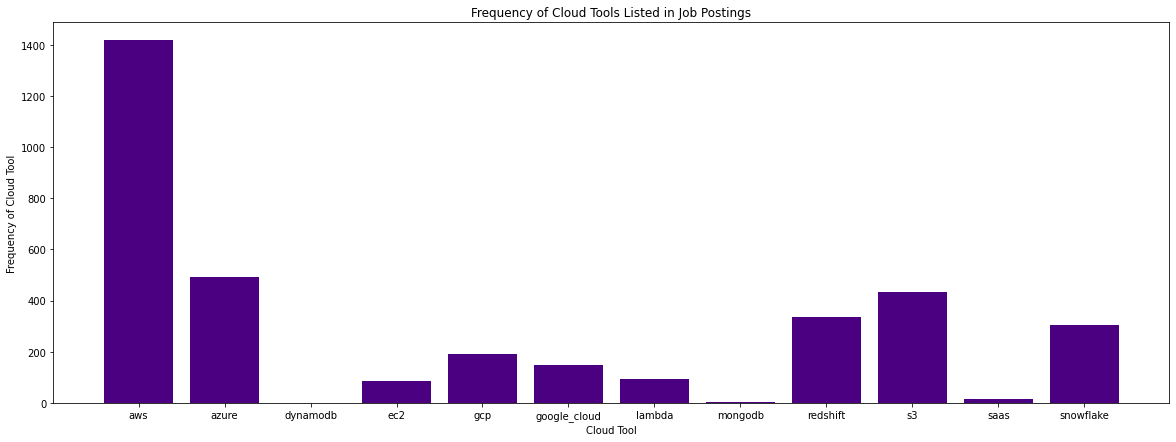

In [87]:
#create a sum of each cloud column
aws_sum = sum(cleaned_desc['aws'])
azure_sum = sum(cleaned_desc['azure'])
dynamodb_sum = sum(cleaned_desc['dynamodb'])
ec2_sum = sum(cleaned_desc['ec2'])
gcp_sum = sum(cleaned_desc['gcp'])
google_cloud_sum = sum(cleaned_desc['google cloud'])
lambda_sum = sum(cleaned_desc['lambda']) 
mongodb_sum = sum(cleaned_desc['mongodb'])
redshift_sum = sum(cleaned_desc['redshift'])
s3_sum = sum(cleaned_desc['s3'])
saas_sum = sum(cleaned_desc['saas'])
snowflake_sum = sum(cleaned_desc['snowflake'])

#make a dictionary of cloud sums so we can plot visualization
cloud_sums = {'aws': aws_sum,'azure': azure_sum,'dynamodb': dynamodb_sum,
'ec2': ec2_sum,'gcp': gcp_sum,'google_cloud': google_cloud_sum,
'lambda': lambda_sum,'mongodb': mongodb_sum,'redshift': redshift_sum,
's3': s3_sum, 'saas': saas_sum, 'snowflake':snowflake_sum}

plt.figure(figsize=(20,7))
plt.bar(range(len(cloud_sums)), list(cloud_sums.values()), align='center', color='indigo')
plt.xticks(range(len(cloud_sums)), list(cloud_sums.keys()))
plt.ylabel('Frequency of Cloud Tool')
plt.title('Frequency of Cloud Tools Listed in Job Postings')
plt.xlabel('Cloud Tool')
plt.show()

**Interpretation**

The most frequently mentioned cloud platform is aws.

#### **Most Popular Outside Platform Tools**

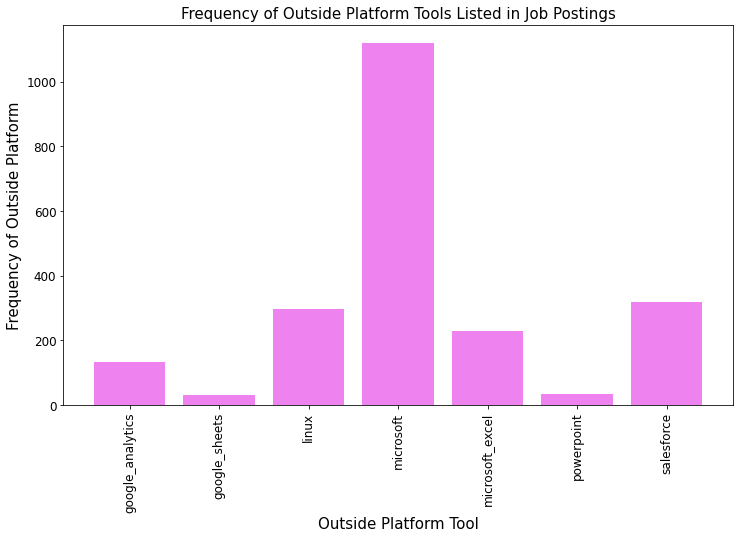

In [88]:
#create a sum of each outside platform tool
google_analytics_sum = sum(cleaned_desc['google analytics'])
google_sheets_sum = sum(cleaned_desc['google sheets'])
linux_sum = sum(cleaned_desc['linux'])
microsoft_sum = sum(cleaned_desc['microsoft'])
microsoft_excel_sum = sum(cleaned_desc['microsoft excel'])
powerpoint_sum = sum(cleaned_desc['powerpoint'])
salesforce_sum = sum(cleaned_desc['salesforce'])

#make a dictionary of miscellaneous outside platform sums so we can plot visualization
platform_sums = {'google_analytics':google_analytics_sum,
'google_sheets':google_sheets_sum,'linux':linux_sum,'microsoft':microsoft_sum,
'microsoft_excel':microsoft_excel_sum, 'powerpoint':powerpoint_sum,
'salesforce':salesforce_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(platform_sums)), list(platform_sums.values()), align='center', color='violet')
plt.xticks(range(len(platform_sums)), list(platform_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Outside Platform', fontsize=15)
plt.title('Frequency of Outside Platform Tools Listed in Job Postings',fontsize=15)
plt.xlabel('Outside Platform Tool', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned outside platform is microsoft.

#### **Most Popular Data Science Concepts**

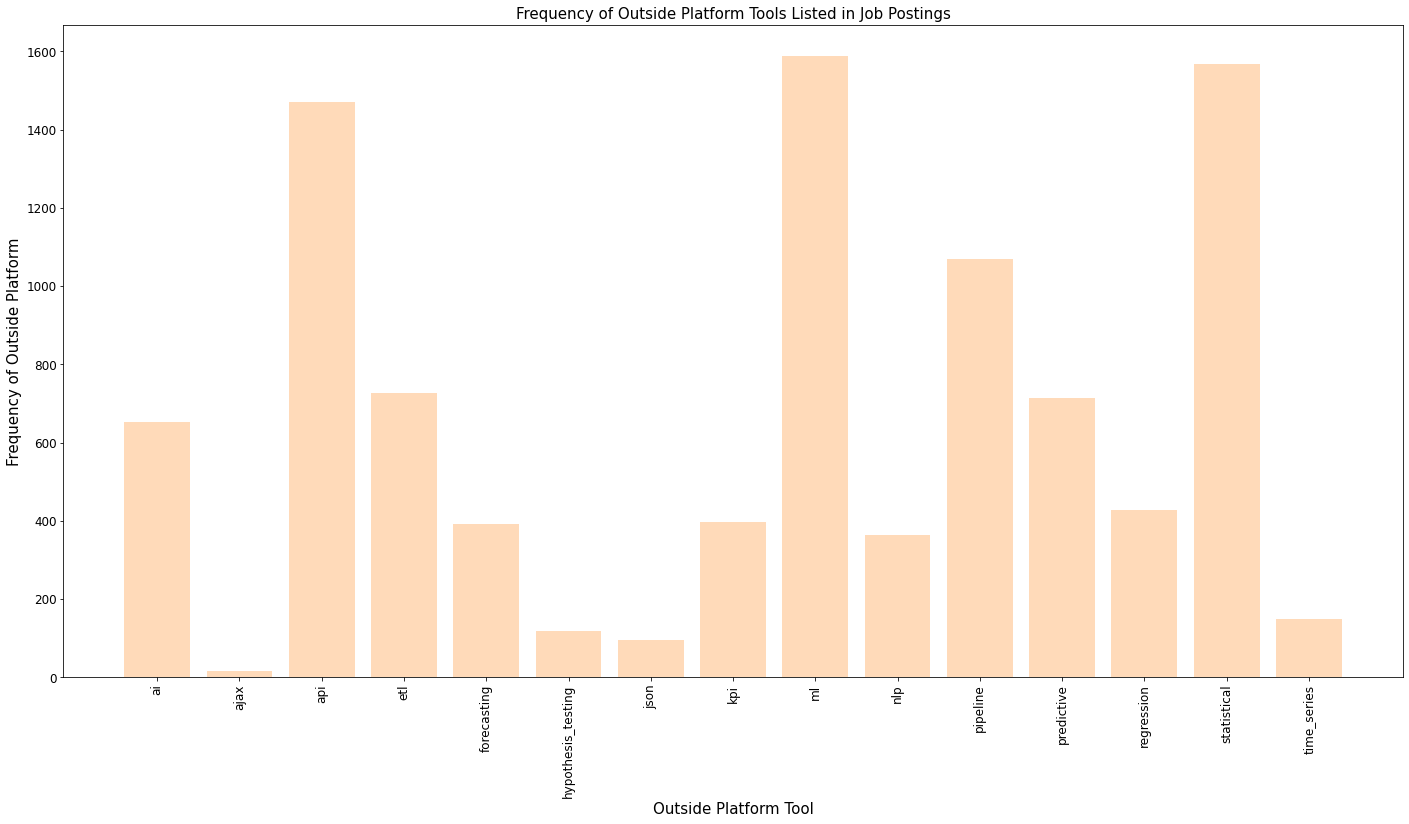

In [89]:
#create a sum of each ds concept
ai_sum = sum(cleaned_desc[' ai '])
ajax_sum = sum(cleaned_desc['ajax'])
api_sum = sum(cleaned_desc['api'])
etl_sum = sum(cleaned_desc['etl'])
forecasting_sum = sum(cleaned_desc['forecasting'])
hypothesis_testing_sum = sum(cleaned_desc['hypothesis testing'])
json_sum = sum(cleaned_desc['json'])
kpi_sum = sum(cleaned_desc['kpi'])
ml_sum = sum(cleaned_desc[' ml '])
nlp_sum = sum(cleaned_desc['nlp'])
pipeline_sum = sum(cleaned_desc['pipeline'])
predictive_sum = sum(cleaned_desc['predictive'])
regression_sum = sum(cleaned_desc['regression'])
statistical_sum = sum(cleaned_desc['statistical'])
time_series_sum = sum(cleaned_desc['time series'])

#make a dictionary of ds concept sums so we can plot visualization
platform_sums = {'ai':ai_sum,'ajax':ajax_sum,'api':api_sum,'etl':etl_sum,
'forecasting': forecasting_sum,'hypothesis_testing': hypothesis_testing_sum,
'json': json_sum,'kpi': kpi_sum,'ml': ml_sum,'nlp': nlp_sum,'pipeline': pipeline_sum,
'predictive': predictive_sum,'regression': regression_sum,
'statistical': statistical_sum,'time_series': time_series_sum}

plt.figure(figsize=(24, 12))
plt.bar(range(len(platform_sums)), list(platform_sums.values()), align='center', color='peachpuff')
plt.xticks(range(len(platform_sums)), list(platform_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Outside Platform', fontsize=15)
plt.title('Frequency of Outside Platform Tools Listed in Job Postings',fontsize=15)
plt.xlabel('Outside Platform Tool', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned skills are api, etl, ml (machine learning), pipeline, predictive, and statistics.

#### **Most Popular Libraries**

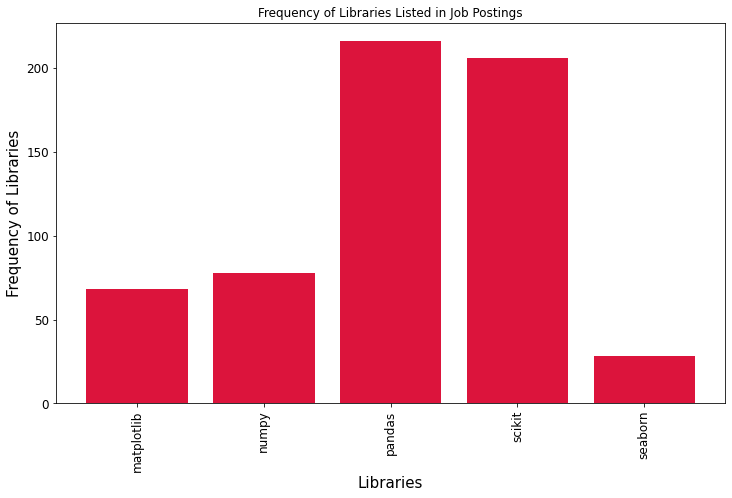

In [90]:
#create a sum of each library
matplotlib_sum = sum(cleaned_desc['matplotlib'])
numpy_sum = sum(cleaned_desc['numpy'])
pandas_sum = sum(cleaned_desc['pandas'])
scikit_sum = sum(cleaned_desc['scikit'])
seaborn_sum = sum(cleaned_desc['seaborn'])

#make a dictionary of libraries so we can plot visualization
library_sums = {'matplotlib':matplotlib_sum,'numpy':numpy_sum,
'pandas': pandas_sum,'scikit': scikit_sum,'seaborn': seaborn_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(library_sums)), list(library_sums.values()), align='center', color='crimson')
plt.xticks(range(len(library_sums)), list(library_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Libraries', fontsize=15)
plt.title('Frequency of Libraries Listed in Job Postings',fontsize=12)
plt.xlabel('Libraries', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned libraries are pandas and scikit. However it's a very small amount of job postings that mentioned libraries.

#### **Most Popular Deep Learning Techniques**

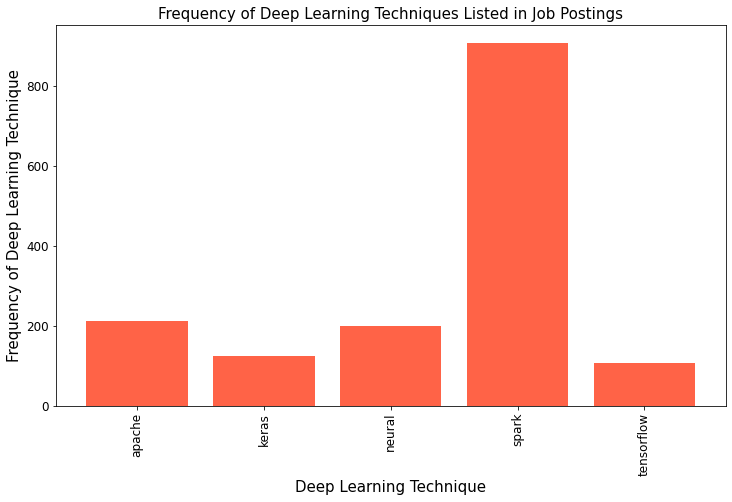

In [91]:
#create a sum of each deep learning technique
apache_sum = sum(cleaned_desc['apache'])
keras_sum = sum(cleaned_desc['keras'])
neural_sum = sum(cleaned_desc['neural'])
spark_sum = sum(cleaned_desc['spark'])
tensorflow_sum = sum(cleaned_desc['tensorflow'])

#make a dictionary of deep learning techniques so we can plot visualization
deep_learning_sums = {'apache': apache_sum,'keras':keras_sum,'neural': neural_sum,
'spark':spark_sum,'tensorflow': tensorflow_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(deep_learning_sums)), list(deep_learning_sums.values()), align='center', color='tomato')
plt.xticks(range(len(deep_learning_sums)), list(deep_learning_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Deep Learning Technique', fontsize=15)
plt.title('Frequency of Deep Learning Techniques Listed in Job Postings',fontsize=15)
plt.xlabel('Deep Learning Technique', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned deep learning technique is spark.

#### **Most Popular Web Application Platforms**

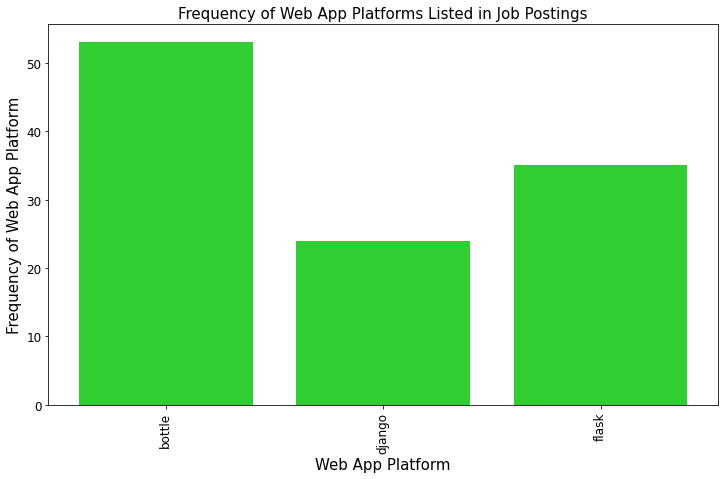

In [92]:
#create a sum of each web application platform
bottle_sum = sum(cleaned_desc['bottle'])
django_sum = sum(cleaned_desc['django'])
flask_sum = sum(cleaned_desc['flask'])

#make a dictionary of web apps so we can plot visualization
web_app_sums = {'bottle':bottle_sum,'django':django_sum,'flask':flask_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(web_app_sums)), list(web_app_sums.values()), align='center', color='limegreen')
plt.xticks(range(len(web_app_sums)), list(web_app_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Web App Platform', fontsize=15)
plt.title('Frequency of Web App Platforms Listed in Job Postings',fontsize=15)
plt.xlabel('Web App Platform', fontsize=15)
plt.show()

**Interpretation**

Web application platforms were rarely mentioned. 

### **Dataframe Building**

#### **DF for All Numeric Data**

In [93]:
#list of columns to add to jobs_df. Purposefully exclude coding platforms,
#libraries, and web application platforms since they weren't mentioned often
add_cols = ['years_exp', 'associates', 'bachelors',
       'masters', 'doctorate', 'senior', 'lead', 'principal', 'manager',
       'bash', 'cplusplus', 'html', 'java', 'javascript', 'julia', 'matlab',
       'oracle', 'python', ' r ', 'ruby', 'sas', 'scala', 'sql', 'dashboard',
       'data studio', 'looker', 'power bi', 'sisense', 'tableau', 'airflow',
       'big data', 'bigquery', 'cassandra', 'docker', 'etl', 'hadoop', 'hbase',
       'hdfs', 'hive', 'impala', 'kafka', 'kubeflow', 'kubernetes', 'aws',
       'azure', 'dynamodb', 'ec2', 'gcp', 'google cloud', 'lambda', 'mongodb',
       'redshift', 's3', 'saas', 'snowflake', 'google analytics',
       'google sheets', 'linux', 'microsoft', 'microsoft excel', 'powerpoint',
       'salesforce', ' ai ', 'ajax', 'api', 'forecasting',
       'hypothesis testing', 'json', 'kpi', ' ml ', 'nlp', 'pipeline',
       'predictive', 'regression', 'statistical', 'time series', 'matplotlib',
       'numpy', 'pandas', 'scikit', 'seaborn', 'apache', 'keras', 'neural',
       'spark', 'tensorflow']
#add numeric skill data to jobs_df
for col in add_cols:
  jobs_df[col] = cleaned_desc[col]

jobs_df

,company,industry,rank,job_title,link,description,search_city,search_job,scrape_date,city,state,min_sal,max_sal,estimate_type,avg_sal,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,dashboard,data studio,...,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn,apache,keras,neural,spark,tensorflow
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,3/21/21,Austin,TX,52000,91000,Glassdoor,71500.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,3/21/21,Austin,TX,35000,64000,Glassdoor,49500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,3/21/21,Austin,TX,44000,81000,Glassdoor,62500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,SamCart,Business Services,4.5,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,3/21/21,Austin,TX,32000,63000,Glassdoor,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Publicis Sapient,Business Services,3.7,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,3/21/21,Austin,TX,44000,80000,Glassdoor,62000.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Inviso Corporation,Business Services,3.9,Data Engineer - Marketing (FTE) - Remote,https://www.glassdoor.com/partner/jobListing.h...,Our team is growing! We are excited to be hiri...,sea,ds,4/25/21,Bellevue,WA,94000,125000,Glassdoor,109500.0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5627,Microsoft,Information Technology,4.4,Principal Data & Applied Scientist Manager,https://www.glassdoor.com/partner/jobListing.h...,Are you looking for opportunities to deliver i...,sea,ds,4/25/21,Redmond,WA,182000,194000,Glassdoor,188000.0,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5628,University of Washington,Education,4.3,RESEARCH SCIENTIST/ENGINEER 1,https://www.glassdoor.com/partner/jobListing.h...,Notes: The University of Washington is followi...,sea,ds,4/25/21,Seattle,WA,25000,56000,Glassdoor,40500.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,Qualtrics,Information Technology,4.1,Staff Applied Scientist-Machine Learning,https://www.glassdoor.com/partner/jobListing.h...,The ChallengeWe are looking for talented and i...,

In [94]:
#create a df of only numeric data to be evaluated
all_jobs_df = jobs_df[['industry', 'rank',
       'search_city', 'search_job', 'min_sal', 'max_sal',
       'avg_sal', 'years_exp', 'associates', 'bachelors',
       'masters', 'doctorate', 'senior', 'lead', 'principal', 'manager',
       'bash', 'cplusplus', 'html', 'java', 'javascript', 'julia', 'matlab',
       'oracle', 'python', ' r ', 'ruby', 'sas', 'scala', 'sql', 'dashboard',
       'data studio', 'looker', 'power bi', 'sisense', 'tableau', 'airflow',
       'big data', 'bigquery', 'cassandra', 'docker', 'etl', 'hadoop', 'hbase',
       'hdfs', 'hive', 'impala', 'kafka', 'kubeflow', 'kubernetes', 'aws',
       'azure', 'dynamodb', 'ec2', 'gcp', 'google cloud', 'lambda', 'mongodb',
       'redshift', 's3', 'saas', 'snowflake', 'google analytics',
       'google sheets', 'linux', 'microsoft', 'microsoft excel', 'powerpoint',
       'salesforce', ' ai ', 'ajax', 'api', 'forecasting',
       'hypothesis testing', 'json', 'kpi', ' ml ', 'nlp', 'pipeline',
       'predictive', 'regression', 'statistical', 'time series', 'apache', 
       'keras', 'neural','spark', 'tensorflow']]
all_jobs_df['industry'] = all_jobs_df['industry'].str.lower()
all_jobs_df

,industry,rank,search_city,search_job,min_sal,max_sal,avg_sal,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,apache,keras,neural,spark,tensorflow
0,business services,3.5,aus,da,52000,91000,71500.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,information technology,3.4,aus,da,35000,64000,49500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,aerospace & defense,3.8,aus,da,44000,81000,62500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,business services,4.5,aus,da,32000,63000,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,business services,3.7,aus,da,44000,80000,62000.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,business services,3.9,sea,ds,94000,125000,109500.0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
5627,information technology,4.4,sea,ds,182000,194000,188000.0,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
5628,education,4.3,sea,ds,25000,56000,40500.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,information technology,4.1,sea,ds,111000,176000,143500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0


##### **Label Encode Industry, Search City, & Search Job into Numeric Data**

In [95]:
le=LabelEncoder()
all_jobs_df['industry']=le.fit_transform(all_jobs_df['industry'])
all_jobs_df['search_city']=le.fit_transform(all_jobs_df['search_city'])
all_jobs_df['search_job']=le.fit_transform(all_jobs_df['search_job'])

all_jobs_df

,industry,rank,search_city,search_job,min_sal,max_sal,avg_sal,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,apache,keras,neural,spark,tensorflow
0,5,3.5,0,1,52000,91000,71500.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,12,3.4,0,1,35000,64000,49500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3.8,0,1,44000,81000,62500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,5,4.5,0,1,32000,63000,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3.7,0,1,44000,80000,62000.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5,3.9,6,3,94000,125000,109500.0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
5627,12,4.4,6,3,182000,194000,188000.0,10,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
5628,8,4.3,6,3,25000,56000,40500.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5629,12,4.1,6,3,111000,176000,143500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0


##### **Correlations**

###### **Heatmap**

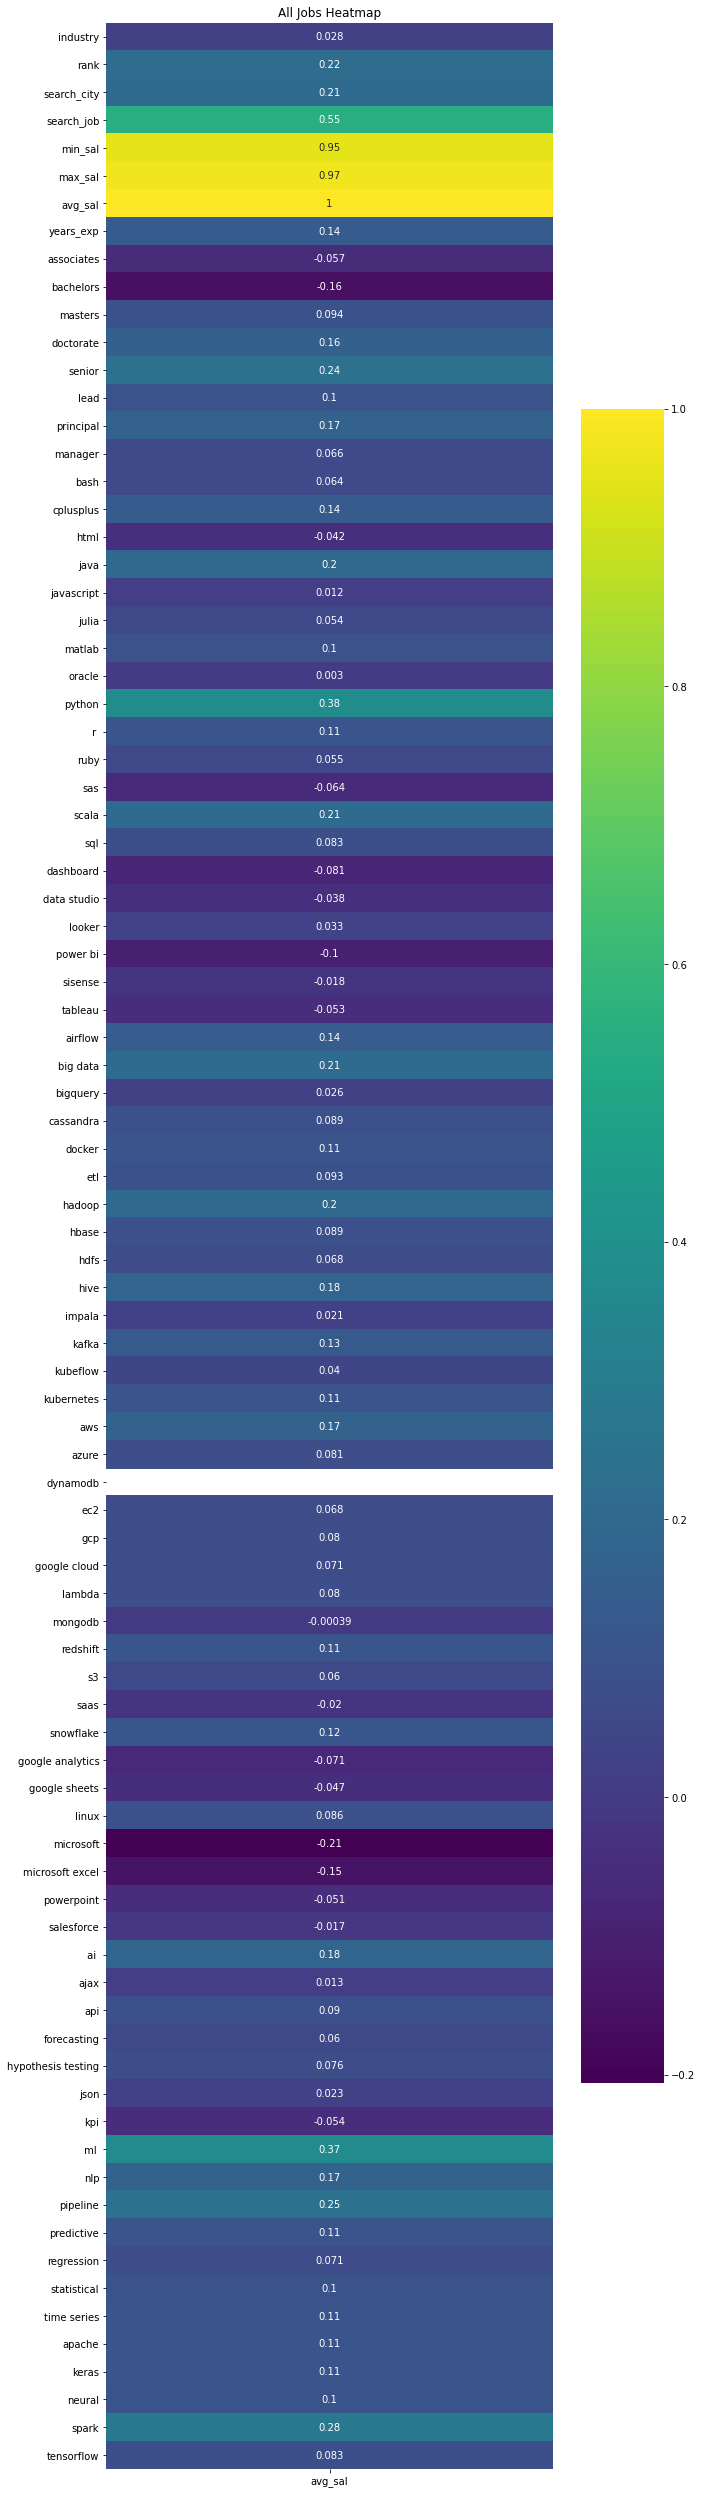

In [96]:
#investigate correlations between avg_sal and remaining varaiables
plt.figure(figsize=(10, 45))
sns.heatmap(pd.DataFrame(pd.DataFrame(all_jobs_df.corr()).avg_sal), annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.title('All Jobs Heatmap')
plt.yticks()
plt.xticks()
plt.show()

###### **Top 20 Correlations**

In [97]:
corr= pd.DataFrame(all_jobs_df.corr())
corr['avg_sal'].sort_values(ascending=False)[:20]

avg_sal        1.000000
max_sal        0.973427
min_sal        0.948988
search_job     0.551493
python         0.376576
 ml            0.368131
spark          0.283606
pipeline       0.248732
senior         0.237881
rank           0.215338
big data       0.212865
search_city    0.211133
scala          0.210773
hadoop         0.202408
java           0.198321
 ai            0.184791
hive           0.176133
principal      0.174212
nlp            0.171215
aws            0.171115
Name: avg_sal, dtype: float64

In [98]:
corr['avg_sal'].sort_values(ascending=False)[-20:]

oracle              0.003021
mongodb            -0.000394
salesforce         -0.016792
sisense            -0.018266
saas               -0.020434
data studio        -0.037872
html               -0.041524
google sheets      -0.047003
powerpoint         -0.051430
tableau            -0.053315
kpi                -0.054351
associates         -0.056951
sas                -0.063541
google analytics   -0.070743
dashboard          -0.080865
power bi           -0.100455
microsoft excel    -0.145182
bachelors          -0.157523
microsoft          -0.205803
dynamodb                 NaN
Name: avg_sal, dtype: float64

###### **Interpretation**

Logically, it makes sense that min_sal & max_sal are highly correlated to avg_sal since they were the columns combined to make avg_sal. Since they are so highly correlated, it's best practice to exclude them from any models tested.

It's interesting that ds, data science search, is more positively correlated to avg_sal than the other job searches. Moreover it's intereting that data science & data engineering were positiviely correlated while data analyst and business analyst were negatively correlated. 

#### **DF's with Simplified Category Values**

With intentions of building an app for model deoployment, expecting a user to enter yes/no for all of the generated features is unrealistic. Let's create some df's that give one score for each of the categories we crated previously. 

In [99]:
#create a new df
categories_df = pd.DataFrame()

#import certain cols from all_jobs_df
cols_to_add = ['industry', 'rank', 'search_city', 'search_job',
               'avg_sal', 'years_exp']

#add colsdata to categories
for col in cols_to_add:
  categories_df[col] = all_jobs_df[col]

categories_df

,industry,rank,search_city,search_job,avg_sal,years_exp
0,5,3.5,0,1,71500.0,3
1,12,3.4,0,1,49500.0,1
2,1,3.8,0,1,62500.0,7
3,5,4.5,0,1,47500.0,3
4,5,3.7,0,1,62000.0,8
...,...,...,...,...,...,...
5626,5,3.9,6,3,109500.0,5
5627,12,4.4,6,3,188000.0,10
5628,8,4.3,6,3,40500.0,1
5629,12,4.1,6,3,143500.0,7


In [100]:
#create a feature for degrees
categories_df['degrees_total'] = all_jobs_df.iloc[:,8:12].sum(axis=1)

#create a feature for senior job titles
categories_df['sen_job_titles_total'] = all_jobs_df.iloc[:, 12:16].sum(axis=1)

#create a feature for languages
categories_df['languages_total'] = all_jobs_df.iloc[:, 16:30].sum(axis=1)

#create a feature for visualization totals
categories_df['visualization_total'] = all_jobs_df.iloc[:, 30:36].sum(axis=1)

#create a feature for big data tools
categories_df['big_data_total'] = all_jobs_df.iloc[:, 36:50].sum(axis=1)

#create a feature for cloud tools
categories_df['cloud_total'] = all_jobs_df.iloc[:, 50:62].sum(axis=1)

#create a feature for platform tools
categories_df['platform_total'] = all_jobs_df.iloc[:, 62:69].sum(axis=1)

#create a feature for data science concepts
categories_df['ds_concepts_total'] = all_jobs_df.iloc[:, 69:83].sum(axis=1)

#create a feature for deep learning concepts
categories_df['deep_learning_totals'] = all_jobs_df.iloc[:, 83:88].sum(axis=1)

#create a feature for log of avg_sal, will be tested for performance in models
categories_df['log_avg_sal'] = np.log1p(categories_df['avg_sal'])

categories_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5,3.9,6,3,109500.0,5,1,0,1,1,1,2,2,4,0,11.603689
5627,12,4.4,6,3,188000.0,10,0,2,2,0,1,1,1,3,1,12.144203
5628,8,4.3,6,3,40500.0,1,1,0,1,0,0,0,0,0,0,10.609082
5629,12,4.1,6,3,143500.0,7,1,0,1,0,0,0,0,5,0,11.874097


#### **DF for Jobs With Years of Experience**

In [101]:
yrs_exp = categories_df['years_exp'] != -1
yrs_exp_df = categories_df.iloc[yrs_exp.values]
yrs_exp_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5,3.9,6,3,109500.0,5,1,0,1,1,1,2,2,4,0,11.603689
5627,12,4.4,6,3,188000.0,10,0,2,2,0,1,1,1,3,1,12.144203
5628,8,4.3,6,3,40500.0,1,1,0,1,0,0,0,0,0,0,10.609082
5629,12,4.1,6,3,143500.0,7,1,0,1,0,0,0,0,5,0,11.874097


#### **DF for Categories Outliers Removed**

Since we know our target variable isn't perfectly normally distributed, we can create another dataframe for model testing that drops the outliers.

We will keep the 1.5 times +/- interquartile range salaries to see if that helps model performance later on. 

In [102]:
#calculate interquartile range of avg_sal
cat_q25, cat_q75 = np.percentile(categories_df['avg_sal'], 25),np.percentile(categories_df['avg_sal'], 75)
cat_iqr = cat_q75 - cat_q25

#calculate the outlier cutoff
cat_cut_off = cat_iqr * 1.5

#calculate upper and lower outlier limits
cat_lower, cat_upper = cat_q25 - cat_cut_off, cat_q75 + cat_cut_off

#select all salaries in between the lower and upper limits
cat_in_range = (categories_df['avg_sal'] > cat_lower) & (categories_df['avg_sal'] < cat_upper)

#create a new df with the salaries that are in between the lower and upper limites
cat_no_outliers_df = categories_df.iloc[cat_in_range.values]

cat_no_outliers_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5,3.9,6,3,109500.0,5,1,0,1,1,1,2,2,4,0,11.603689
5627,12,4.4,6,3,188000.0,10,0,2,2,0,1,1,1,3,1,12.144203
5628,8,4.3,6,3,40500.0,1,1,0,1,0,0,0,0,0,0,10.609082
5629,12,4.1,6,3,143500.0,7,1,0,1,0,0,0,0,5,0,11.874097


In [103]:
cat_shape_diff = categories_df.shape[0] - cat_no_outliers_df.shape[0]
print('The categories dataframe had {} outliers dropped.'.format(cat_shape_diff))

The categories dataframe had 62 outliers dropped.


#### **DF for Years of Experience Outliers Removed**

Since we know our target variable isn't perfectly normally distributed, we can create another dataframe for model testing that drops the outliers.

We will keep the 1.5 times +/- interquartile range salaries to see if that helps model performance later on. 

In [104]:
#calculate interquartile range of avg_sal
yrs_q25, yrs_q75 = np.percentile(yrs_exp_df['avg_sal'], 25),np.percentile(yrs_exp_df['avg_sal'], 75)
yrs_iqr = yrs_q75 - yrs_q25

#calculate the outlier cutoff
yrs_cut_off = yrs_iqr * 1.5

#calculate upper and lower outlier limits
yrs_lower, yrs_upper = yrs_q25 - yrs_cut_off, yrs_q75 + yrs_cut_off

#select all salaries in between the lower and upper limits
yrs_in_range = (yrs_exp_df['avg_sal'] > yrs_lower) & (yrs_exp_df['avg_sal'] < yrs_upper)

#create a new df with the salaries that are in between the lower and upper limites
yrs_exp_no_outliers_df = yrs_exp_df.iloc[yrs_in_range.values]

yrs_exp_no_outliers_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5,3.9,6,3,109500.0,5,1,0,1,1,1,2,2,4,0,11.603689
5627,12,4.4,6,3,188000.0,10,0,2,2,0,1,1,1,3,1,12.144203
5628,8,4.3,6,3,40500.0,1,1,0,1,0,0,0,0,0,0,10.609082
5629,12,4.1,6,3,143500.0,7,1,0,1,0,0,0,0,5,0,11.874097


In [105]:
yrs_exp_shape_diff = yrs_exp_df.shape[0] - yrs_exp_no_outliers_df.shape[0]
print('The yrs_exp dataframe had {} outliers dropped.'.format(cat_shape_diff))

The yrs_exp dataframe had 62 outliers dropped.


#### **Correlations**

##### **Heatmaps**

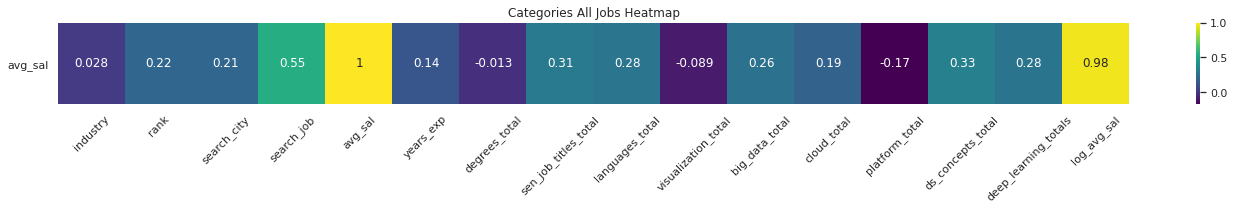

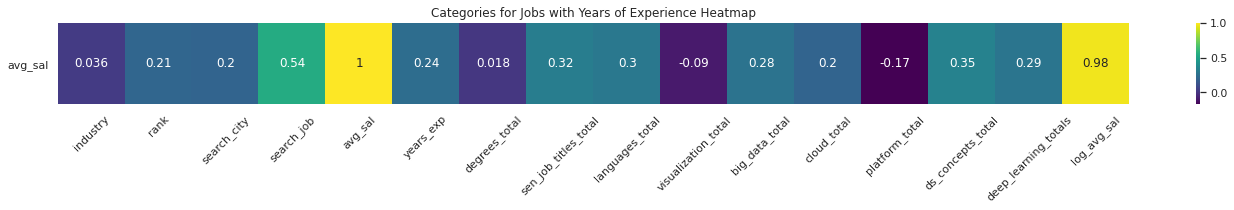

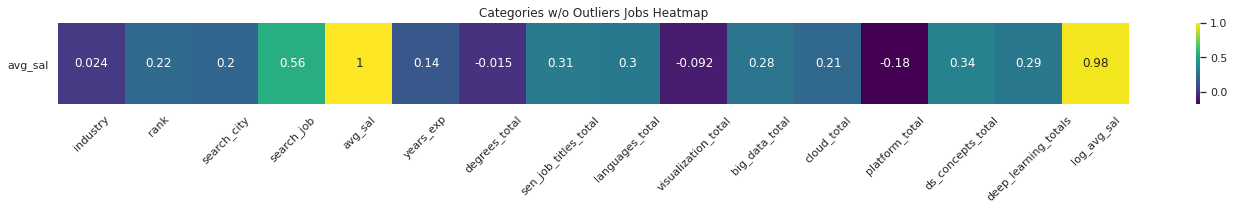

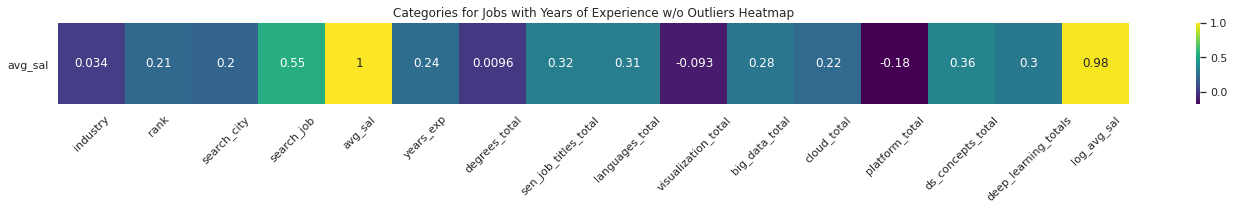

In [106]:
#investigate correlations between avg_sal and remaining varaiables

#categories_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(categories_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories All Jobs Heatmap')

#yrs_exp_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(yrs_exp_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories for Jobs with Years of Experience Heatmap')
plt.show()

#cat_no_outliers_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(cat_no_outliers_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories w/o Outliers Jobs Heatmap')

#yrs_exp_no_outliers_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(yrs_exp_no_outliers_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories for Jobs with Years of Experience w/o Outliers Heatmap')
plt.show()

##### **Ordered Correlations**

In [107]:
#categories_df correlations
cat_corr= pd.DataFrame(categories_df.corr())
cat_corr_sorted = cat_corr['avg_sal'].sort_values(ascending=False)
print('***Categories Ordered Correlations***')
print(cat_corr_sorted)
print()

#yrs_experience correlations
yrs_corr= pd.DataFrame(yrs_exp_df.corr())
yrs_corr_sorted = yrs_corr['avg_sal'].sort_values(ascending=False)
print('***Years Experience Ordered Correlations***')
print(yrs_corr_sorted)

#cat_no_outliers_df correlations
cat_no_outliers_corr= pd.DataFrame(cat_no_outliers_df.corr())
cat_no_outliers_corr_sorted = cat_no_outliers_corr['avg_sal'].sort_values(ascending=False)
print('***Categories w/o Outliers Ordered Correlations***')
print(cat_no_outliers_corr_sorted)
print()

#yrs_exp_no_outliers_df correlations
yrs_no_outliers_corr= pd.DataFrame(yrs_exp_no_outliers_df.corr())
yrs_no_outliers_corr_sorted = yrs_no_outliers_corr['avg_sal'].sort_values(ascending=False)
print('***Years Experience w/o Outliers Ordered Correlations***')
print(yrs_no_outliers_corr_sorted)

***Categories Ordered Correlations***
avg_sal                 1.000000
log_avg_sal             0.975512
search_job              0.551493
ds_concepts_total       0.331522
sen_job_titles_total    0.305201
languages_total         0.280521
deep_learning_totals    0.277916
big_data_total          0.263317
rank                    0.215338
search_city             0.211133
cloud_total             0.191901
years_exp               0.138786
industry                0.028132
degrees_total          -0.012779
visualization_total    -0.088785
platform_total         -0.174429
Name: avg_sal, dtype: float64

***Years Experience Ordered Correlations***
avg_sal                 1.000000
log_avg_sal             0.975300
search_job              0.543933
ds_concepts_total       0.345166
sen_job_titles_total    0.324223
languages_total         0.300413
deep_learning_totals    0.287207
big_data_total          0.277635
years_exp               0.244271
rank                    0.213558
cloud_total             0.204

##### **Interpretation**

**Categories Ordered Heatmap**

Now that our categories are combined into sums, it's interesting that the search_job is the highest positively correlated feature when before two of the jobs were positively correlated and two slightly negatively correlated. 

**Comparison of Categories vs Yrs Experience**

When only jobs that had years of experience were considered, the first two highly correlated features, search_jobs and sen_job_title, were the same in order but features were different from there. Features correlation coefficients were similar in each but order changed.

Years of Experience had nearly twice the positive correlation with avg_sal than it did in the categories only df. 


# **Dataframe Extraction**

The following dataframes will be exported to make use of in the model testing notebook.

*   **categories_df:** numeric data of combined sums of the categorie we extrapolated from the job descriptions. 2012 rows × 16 columns
*   **yrs_exp_df**: categories excluding jobs that did not have years of experience listed. 1711 rows × 16 columns
*   **cat_no_outliers_df:** numeric data of combined sums of the categorie we extrapolated from the job descriptions, outliers removed. 2012 rows × 16 columns
*   **yrs_exp_no_outliers_df**: categories excluding jobs that did not have years of experience listed, outliers removed. 1711 rows × 16 columns

In [130]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [132]:
categories_df.to_csv('/drive/My Drive/Thinkful/Careers Counseling/Glassdoor Scraping/categories_df.csv')
yrs_exp_df.to_csv('/drive/My Drive/Thinkful/Careers Counseling/Glassdoor Scraping/yrs_exp_df.csv')
cat_no_outliers_df.to_csv('/drive/My Drive/Thinkful/Careers Counseling/Glassdoor Scraping/cat_no_outliers_df.csv')
yrs_exp_no_outliers_df.to_csv('/drive/My Drive/Thinkful/Careers Counseling/Glassdoor Scraping/yrs_exp_no_outliers_df.csv')

## **Hypothesis Testing**

### **Target Variable**

#### **Is average salary variable normally distributed?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal

In [109]:
#Is the avg_salary distribution normal?
t,p=stats.shapiro(yrs_exp_no_outliers_df['avg_sal'])

#set up text wrapper for explanation of t-test because the explanation is long
wrapper = textwrap.TextWrapper(width=80)

#explanation of t-testing
if np.round(p, decimals=4) < 0.05:
  ttest_less = 'The p-value of {} is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the avg_sal variable is not normally distributed.'.format(p, decimals=4)
  ttest_less_str = wrapper.fill(text=ttest_less)
  print(ttest_less_str)
elif np.round(p, decimals=4) > 0.05:
  ttest_more = 'The p-value of {} is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the avg_sal varaible is not normally distributed.'.format(p, decimals=4)
  ttest_more_str = wrapper.fill(text=ttest_more)
  print(ttest_more_str)

The p-value of 6.555876580341049e-32 is less than 0.05, so we reject the Null
Hypothesis. There is sufficient evidence to support the avg_sal variable is not
normally distributed.


While non-normality was expected, it's important to also look at skewness and kurtosis. 

In [110]:
#investigate skewness of avg_sal variable
avg_sal_k = np.round(yrs_exp_no_outliers_df['avg_sal'].kurtosis(), decimals = 4)
#print explanation of skewness
if avg_sal_k < 0:
  print('The Kurtosis value of {} tells us the avg_sal varaible is skewed left.'.format(avg_sal_k))
elif avg_sal_k > 0:
  print('The Kurtosis value of {} tells us the avg_sal variable is skewed right.'.format(avg_sal_k))

The Kurtosis value of -0.4155 tells us the avg_sal varaible is skewed left.


##### **Conclusion**

Since the Kurtosis value of the avg_sal variable is between the loose -3 to 3 range, it's safe to proceed with parametric testing. 

### **Is there a significant difference in avg_sal by search job?**

#### **Is average salary variable normally distributed per search_job?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal

In [111]:
#segregate data by city & search
is_aus = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 0]
is_bos = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 1]
is_chi = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 2]
is_co =  yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 3]
is_la =  yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 4]
is_ny =  yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 5]
is_sea = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 6]
is_sf =  yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 7]

is_da = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_job'] == 1]
is_de = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_job'] == 2]
is_ba = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_job'] == 0]
is_ds = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_job'] == 3]

In [112]:
search_jobs = {'Data Analyst': is_da, 'Data Engineer':is_de, 
               'Business Analyst':is_ba, 'Data Scientist':is_ds}

for title, job in search_jobs.items():
  #Is the avg_salary distribution normal?
  t,p=stats.shapiro(job['avg_sal'])
  
  #explanation of t-testing
  if np.round(p, decimals=4) < 0.05:
    ttest_less = 'The p-value for {}, of {}, is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the avg_sal variable is not normally distributed.'.format(title, p, decimals=4)
    ttest_less_str = wrapper.fill(text=ttest_less)
    print(ttest_less_str)
    print()
  elif np.round(p, decimals=4) > 0.05:
    ttest_more = 'The p-value for {}, of {}, is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the avg_sal varaible is not normally distributed.'.format(title, p, decimals=4)
    ttest_more_str = wrapper.fill(text=ttest_more)
    print(ttest_more_str)
    print()

The p-value for Data Analyst, of 2.5321442481249094e-21, is less than 0.05, so
we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.

The p-value for Data Engineer, of 8.737952725823561e-07, is less than 0.05, so
we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.

The p-value for Business Analyst, of 1.895695864118509e-23, is less than 0.05,
so we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.

The p-value for Data Scientist, of 0.0021038143895566463, is less than 0.05, so
we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.



While non-normality was expected, it's important to also look at skewness and kurtosis. 

In [113]:
for title, job in search_jobs.items():
  #investigate skewness of avg_sal variable
  avg_sal_k = np.round(job['avg_sal'].kurtosis(), decimals = 4)
  #print explanation of skewness
  if avg_sal_k < 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal varaible is skewed left.'.format(title, avg_sal_k))
    print()
  elif avg_sal_k > 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal variable is skewed right.'.format(title, avg_sal_k))
    print()

The Kurtosis value for Data Analyst, of 1.3671, tells us the avg_sal variable is skewed right.

The Kurtosis value for Data Engineer, of -0.4252, tells us the avg_sal varaible is skewed left.

The Kurtosis value for Business Analyst, of 1.4005, tells us the avg_sal variable is skewed right.

The Kurtosis value for Data Scientist, of -0.3571, tells us the avg_sal varaible is skewed left.



##### **Conclusion**

Since the Kurtosis values of each search job avg_sal variable is between the loose -3 to 3 range, it's safe to proceed with parametric testing. 

#### **One-Way ANOVA**
Identifying if any one search job differs in avg_sal from the others

In [114]:
job_anova = stats.f_oneway(is_da['avg_sal'],is_de['avg_sal'],is_ba['avg_sal'],is_ds['avg_sal'])

#explanation of anova-testing
if np.round(job_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(job_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 0.0, is less than 0.05. There is sufficient evidence to support
at least one search job has an average salary that is significantly different
than the others.


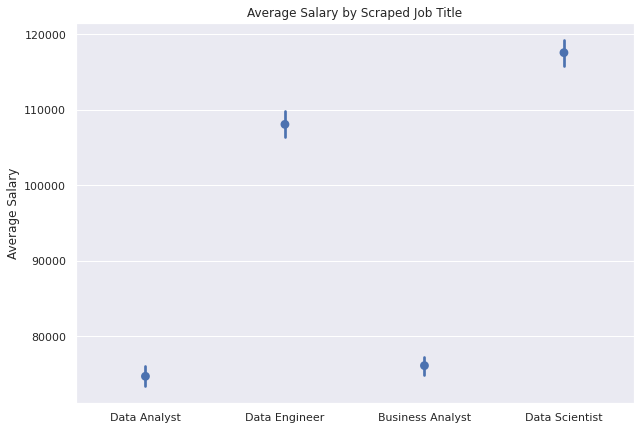

In [115]:
#visualize difference
plt.figure(figsize=(10,7))
avg_sal_diff = sns.pointplot(data= [is_da['avg_sal'],is_de['avg_sal'],is_ba['avg_sal'],is_ds['avg_sal']],
                    join= False)
avg_sal_diff.set(xticklabels = ['Data Analyst', 'Data Engineer', 'Business Analyst', 'Data Scientist'])
avg_sal_diff.set(ylabel='Average Salary')
plt.title('Average Salary by Scraped Job Title')
plt.show()

In [116]:
job_anova = stats.f_oneway(is_da['avg_sal'],is_de['avg_sal'],is_ba['avg_sal'],is_ds['avg_sal'])

#explanation of anova-testing
if np.round(job_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(job_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 0.0, is less than 0.05. There is sufficient evidence to support
at least one search job has an average salary that is significantly different
than the others.


##### **Conclusion**

It appears that Data Analyst & Business Analyst positions have significantly lower average salaires than Data Engineer and Data Scientist Positions. Let's see if these two groups have same averages with t-testing. Then, we can compare Data Engineer and Business Analyst to confirm this thouhgt.

#### **T-Testing**

In [117]:
#data analyst & business analyst t-test
da_ba_ttest = stats.ttest_ind(is_da['avg_sal'], is_ba['avg_sal'])

#explanation of t-testing
if np.round(da_ba_ttest[1], decimals=4) < 0.05:
  da_ba_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support data analyst & business analyst positions have different average salaries.'.format(da_ba_ttest[1], decimals=4)
  da_ba_less_str = wrapper.fill(text=da_ba_less)
  print(da_ba_less_str)
  print()
elif np.round(da_ba_ttest[1], decimals=4) > 0.05:
  da_ba_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support data analyst & business analyst positions have different average salaries.'.format(da_ba_ttest[1], decimals=4)
  da_ba_more_str = wrapper.fill(text=da_ba_more)
  print(da_ba_more_str)
  print()

#data engineer & data scientist t-test
de_ds_ttest = stats.ttest_ind(is_de['avg_sal'], is_ds['avg_sal'])

#explanation of t-testing
if np.round(de_ds_ttest[1], decimals=4) < 0.05:
  de_ds_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support data engineer & data scientist positions have different average salaries.'.format(de_ds_ttest[1], decimals=4)
  de_ds_less_str = wrapper.fill(text=de_ds_less)
  print(de_ds_less_str)
  print()
elif np.round(de_ds_ttest[1], decimals=4) > 0.05:
  de_ds_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support data engineer & data scientist positions have different average salaries.'.format(de_ds_ttest[1], decimals=4)
  de_ds_more_str = wrapper.fill(text=de_ds_more)
  print(de_ds_more_str)
  print()

#data engineer & businnes analyst t-test
de_ba_ttest = stats.ttest_ind(is_de['avg_sal'], is_ba['avg_sal'])

#explanation of t-testing
if np.round(de_ba_ttest[1], decimals=4) < 0.05:
  de_ba_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support data engineer & businnes analyst positions have different average salaries.'.format(de_ba_ttest[1], decimals=4)
  de_ba_less_str = wrapper.fill(text=de_ba_less)
  print(de_ba_less_str)
  print()
elif np.round(de_ba_ttest[1], decimals=4) > 0.05:
  de_ba_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support data engineer & businnes analyst positions have different average salaries.'.format(de_ba_ttest[1], decimals=4)
  de_ba_more_str = wrapper.fill(text=de_ba_more)
  print(de_ba_more_str)
  print()

The p-value of 0.12574682005973714, is more than 0.05. There is not sufficient
evidence to support data analyst & business analyst positions have different
average salaries.

The p-value of 5.199750523458784e-15, is less than 0.05. There is sufficient
evidence to support data engineer & data scientist positions have different
average salaries.

The p-value of 3.9547316413594846e-176, is less than 0.05. There is sufficient
evidence to support data engineer & businnes analyst positions have different
average salaries.



##### **Conclusion**

It is confirmed that Data Analyst & Business Analyst positions have significantly lower average salaires than Data Engineer and Data Scientist Positions. However, the average salaries between the group of Data Analyst and Data Engineer compared to Business Analyst and Data Scientist positions are significantly different. 

### **Is there a significant difference in avg_sal by search city?**

#### **Is average salary variable normally distributed per search_city?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal

In [118]:
search_cities = {'Austin': is_aus, 'Boston':is_bos, 'Chicago':is_chi,
                 'Colorado':is_co, 'Los Angeles':is_la, 'New York': is_ny, 
                 'Seattle':is_sea, 'San Francisco':is_sf}

for city, df in search_cities.items():
  #Is the avg_salary distribution normal?
  t,p=stats.shapiro(df['avg_sal'])
  
  #explanation of t-testing
  if np.round(p, decimals=4) < 0.05:
    ttest_less = 'The p-value for {}, of {}, is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the avg_sal variable is not normally distributed.'.format(city, p, decimals=4)
    ttest_less_str = wrapper.fill(text=ttest_less)
    print(ttest_less_str)
    print()
  elif np.round(p, decimals=4) > 0.05:
    ttest_more = 'The p-value for {}, of {}, is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the avg_sal varaible is not normally distributed.'.format(city, p, decimals=4)
    ttest_more_str = wrapper.fill(text=ttest_more)
    print(ttest_more_str)
    print()

The p-value for Austin, of 4.3179486652888954e-08, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Boston, of 2.830007007816743e-13, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Chicago, of 2.1315015030776152e-10, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Colorado, of 8.785982466737174e-13, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Los Angeles, of 5.079077783354258e-12, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for New 

While non-normality was expected, it's important to also look at skewness and kurtosis. 

In [119]:
for city, df in search_cities.items():
  #investigate skewness of avg_sal variable
  avg_sal_k = np.round(df['avg_sal'].kurtosis(), decimals = 4)
  #print explanation of skewness
  if avg_sal_k < 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal varaible is skewed left.'.format(city, avg_sal_k))
    print()
  elif avg_sal_k > 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal variable is skewed right.'.format(city, avg_sal_k))
    print()

The Kurtosis value for Austin, of -0.7144, tells us the avg_sal varaible is skewed left.

The Kurtosis value for Boston, of 0.0187, tells us the avg_sal variable is skewed right.

The Kurtosis value for Chicago, of 0.0165, tells us the avg_sal variable is skewed right.

The Kurtosis value for Colorado, of 0.2807, tells us the avg_sal variable is skewed right.

The Kurtosis value for Los Angeles, of -0.5085, tells us the avg_sal varaible is skewed left.

The Kurtosis value for New York, of -0.8636, tells us the avg_sal varaible is skewed left.

The Kurtosis value for Seattle, of -0.4372, tells us the avg_sal varaible is skewed left.

The Kurtosis value for San Francisco, of -0.7433, tells us the avg_sal varaible is skewed left.



##### **Conclusion**

Since the Kurtosis values of each search city, excluding Boston which has some outliers affecting Kurtosis, avg_sal variable is between the loose -3 to 3 range, it's safe to proceed with parametric testing. 

#### **One-Way ANOVA**
Identifying if any one search job differs in avg_sal from the others

In [120]:
city_anova = stats.f_oneway(is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'],is_la['avg_sal'], is_ny['avg_sal'],
                            is_sea['avg_sal'],is_sf['avg_sal'])

#explanation of anova-testing
if np.round(city_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(city_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 5.299178111409686e-69, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


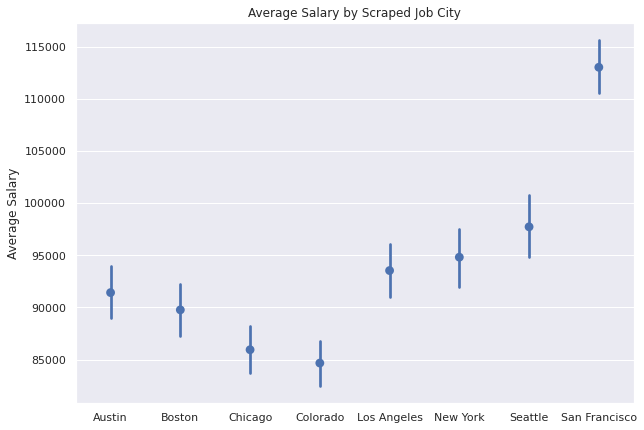

In [121]:
#visualize difference
plt.figure(figsize=(10,7))
avg_sal_diff = sns.pointplot(data= [is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'],is_la['avg_sal'], is_ny['avg_sal'],
                            is_sea['avg_sal'],is_sf['avg_sal']], join= False)

avg_sal_diff.set(xticklabels = ['Austin', 'Boston', 'Chicago', 'Colorado', 
                                'Los Angeles', 'New York', 'Seattle','San Francisco',])
avg_sal_diff.set(ylabel='Average Salary')
plt.title('Average Salary by Scraped Job City')
plt.show()

##### **Conclusion**

It appears that San Francisco has a significantly higher avg_salary than the other cities and there might be groups of others that are similar. For Example, Boston & Chicago seem smilar while Austin, LA, New York, and Seattle seem similar to each other. Let's do some more ANOVA testing to confirm.

#### **Grouped ANOVA Testing**

In [122]:
aus_bos_chi_anova = stats.f_oneway(is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'])

#explanation of anova-testing
if np.round(aus_bos_chi_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(aus_bos_chi_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 5.299178111409686e-69, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [123]:
aus_bos_chi_co_anova = stats.f_oneway(is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'])

#explanation of anova-testing
if np.round(aus_bos_chi_co_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(aus_bos_chi_co_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 5.299178111409686e-69, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [124]:
bos_chi_co_anova = stats.f_oneway(is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'])

#explanation of anova-testing
if np.round(bos_chi_co_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(bos_chi_co_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 5.299178111409686e-69, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [125]:
aus_la_ny_sea_anova = stats.f_oneway(is_aus['avg_sal'], is_la['avg_sal'],is_ny['avg_sal'],is_sea['avg_sal'])

#explanation of anova-testing
if np.round(aus_la_ny_sea_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(aus_la_ny_sea_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 5.299178111409686e-69, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [126]:
aus_la_ny_anova = stats.f_oneway(is_aus['avg_sal'], is_la['avg_sal'],is_ny['avg_sal'])

#explanation of anova-testing
if np.round(aus_la_ny_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(aus_la_ny_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 5.299178111409686e-69, is more than 0.05. There is not sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [127]:
la_ny_sea_anova = stats.f_oneway(is_la['avg_sal'],is_ny['avg_sal'],is_sea['avg_sal'])

#explanation of anova-testing
if np.round(la_ny_sea_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(la_ny_sea_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 5.299178111409686e-69, is more than 0.05. There is not sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [128]:
la_ny_sea_sf_anova = stats.f_oneway(is_la['avg_sal'],is_ny['avg_sal'],is_sea['avg_sal'], is_sf['avg_sal'])

#explanation of anova-testing
if np.round(la_ny_sea_sf_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(la_ny_sea_sf_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 5.299178111409686e-69, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


##### **Conclusion**

It is confirmed that Austin positions have a significanlty larger salary than Boston, Chicago, and Colorado positions. However, when grouped with LA, NY, and Seattle, Austin positions have similar average salaires to LA and NY but significantly lower than Seattle. Finally, San Francisco had a significantly higher average salary than all other locations. 